# **Data Science Machine Learning Project 2**

For this Project I was tasked to find my own dataset that not only fit certain criteria, but also something that interests me or my future endeavors.

I chose a dataset that pertains to the healthcare industry. As I come from a pharmacy background, and would like to work in data science in the healthcare industry this dataset uncompases both these goals.

**Context**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# **Part 1 Choosing a Dataset**

**Project 2 - Part 1** 

For this task:

Create a Colab notebook where you have uploaded and shown the .head() of each of your data sets.  For each of the proposed datasets, answer the following questions:

**1) Source of data**

Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

**2) Brief description of data**

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, and smoking status. Each row in the data provides relavant information about the patient.

**3) What is the target?**

If a patient will have a stroke or not

**4) Is this a classification or regression problem?**

Classification

**5) How many features?**

12

**6) How many rows of data.**

583

**7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?**

Being able to tune the data to be accurate and precicise enough to be able to evaluate if a patient will have a stroke. Being able to explore and explain the data in a way that makes sense and leads to logical conclusions.

# **Mount Drive / Import Libraries / Load Dataset / Check Info**

## Mount Drive


In [183]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

In [184]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, silhouette_score
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn import set_config
set_config(display='diagram')

## Load Dataset

In [185]:
# Load dataset 
df= '/content/healthcare-dataset-stroke-data.csv'
df= pd.read_csv(df, index_col=0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Check Info

In [187]:
# Get a quick overview of the data within the columns and what data type the column provides
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [188]:
# Get a quick overview of the numeric data columns
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# **Part 2 Clean the Data**

**Project 2 - Part 2** 

Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.  

To meet the requirements for this week you must have:

- Deleted unnecessary columns

- Deleted duplicate rows

- Identified and addressed missing values 

- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

- Identified outliers

- Clearly commented all of your cleaning steps and described any decisions you made  


# **Data Cleaning**

## Rename Columns

In [189]:
# Rename Columns to Clean Things Up
df.rename(columns = {'gender':'Gender', 'age':'Age', 'hypertension':'Hypertension', 'heart_disease':'Heart_Disease', 'ever_married':'Ever_Married', 'work_type':'Work_Type', 'Residence_type':'Residence_Type', 'avg_glucose_level':'Avg_Glucose_Level', 'bmi':'BMI', 'smoking_status':'Smoking_Status', 'stroke':'Stroke'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             5110 non-null   object 
 1   Age                5110 non-null   float64
 2   Hypertension       5110 non-null   int64  
 3   Heart_Disease      5110 non-null   int64  
 4   Ever_Married       5110 non-null   object 
 5   Work_Type          5110 non-null   object 
 6   Residence_Type     5110 non-null   object 
 7   Avg_Glucose_Level  5110 non-null   float64
 8   BMI                4909 non-null   float64
 9   Smoking_Status     5110 non-null   object 
 10  Stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


## Check For Duplicates

In [190]:
# Check for Duplicates
df.duplicated().sum()

0

## Identify and Address any Missing Values

In [191]:
# Identify and address any missing values in this dataset. 
df.isna().sum()

Gender                 0
Age                    0
Hypertension           0
Heart_Disease          0
Ever_Married           0
Work_Type              0
Residence_Type         0
Avg_Glucose_Level      0
BMI                  201
Smoking_Status         0
Stroke                 0
dtype: int64

40% of the data for the BMI column is missing I will choose to drop this column since this is a significant amount of missing data.

In [192]:
# Drop BMI column
df = df.drop(columns=['BMI'])
df.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Smoking_Status,Stroke
id,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1


## Clean up Numerical Columns

In [193]:
# Check Data types
data_types = df.dtypes
numerical_data_types = data_types[(data_types == "float64") | (data_types == "int64")]
numerical_data_types

Age                  float64
Hypertension           int64
Heart_Disease          int64
Avg_Glucose_Level    float64
Stroke                 int64
dtype: object

In [194]:
# Check for Outliers
df.describe()

,Age,Hypertension,Heart_Disease,Avg_Glucose_Level,Stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,0.048728
std,22.612647,0.296607,0.226063,45.283560,0.215320
min,0.080000,0.000000,0.000000,55.120000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,0.000000
max,82.000000,1.000000,1.000000,271.740000,1.000000


In [195]:
# Check unique values in dataset
df.apply(lambda x: len(x.unique()))

Gender                  3
Age                   104
Hypertension            2
Heart_Disease           2
Ever_Married            2
Work_Type               5
Residence_Type          2
Avg_Glucose_Level    3979
Smoking_Status          4
Stroke                  2
dtype: int64

I will check the Age and Avg_Glucose_Level columns to see why there is so many unique values. 

The Age column is figured out to the exact amount of days the person was alive on the day of the testing. This is unnecessary, and does not provide any extra value to the information this way. By Rounding the numbers to the closest interger we will decrease the amount of unique values, which will help in future processing and visualization. I will also convert the column to an int since I am rounding the column. This decreases the amount of unique values from 104 to 82.

In [196]:
# Check values for the Age column
df['Age'].unique()

array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01,
       1.08e+00, 1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e

In [197]:
# Round the Age column
df['Age'] = df['Age'].apply(np.ceil)
df['Age'] = df['Age'].apply(np.int64) 
df['Age'].unique()

array([67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 54, 50, 64, 75, 60, 57, 71,
       52, 82, 65, 58, 42, 48, 72, 63, 76, 39, 77, 73, 56, 45, 70, 66, 51,
       43, 68, 47, 53, 38, 55,  2, 46, 32, 14,  3,  8, 37, 40, 35, 20, 44,
       25, 27, 23, 17, 13,  4, 16, 22, 30, 29, 11, 21, 18, 33, 24, 34, 36,
        1, 41,  5, 26, 31,  7, 12, 62,  9, 15, 28, 10, 19,  6])

The Avg_Glucose_Level column was filled with the exact level. This is giving us 3,979 unique values. As there is no significant difference between it being an interger or a decimal I will choose to round this column. By Rounding the numbers to the closest interger we will decrease the amount of unique values, which will help in future processing and visualization. I will also convert the column to an int since I am rounding the column. This decreases the amount of unique values from 3,979 to 207

In [198]:
# Check values for the Avg_Glucose_Level column
df['Avg_Glucose_Level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [199]:
# Round the Avg_Glucose_Level
df['Avg_Glucose_Level'] = df['Avg_Glucose_Level'].apply(np.ceil) 
df['Avg_Glucose_Level'] = df['Avg_Glucose_Level'].apply(np.int64) 
df['Avg_Glucose_Level'].unique()

array([229, 203, 106, 172, 175, 187,  71,  95,  77,  59,  81, 121, 105,
       220, 215, 168, 192, 222,  90, 218, 194, 234, 209, 103, 101, 190,
       196, 212, 213,  84, 197, 253,  85,  75,  93,  61,  79,  72, 145,
        91, 214, 244, 110, 108, 100,  76, 128, 125, 198,  60, 238, 195,
       181, 186,  62,  94, 114,  87,  73,  63, 180, 117,  97,  67, 241,
       111, 166, 144, 102,  89,  80, 112,  99, 227,  69,  65, 236,  83,
       191, 232,  74, 130, 107, 225, 217, 260, 250, 132, 201, 131, 183,
       207, 264, 141, 208, 200, 104, 152,  68, 240, 170, 224,  78,  58,
        82, 204, 134, 163,  92,  98,  57, 113, 138, 216, 210, 206, 119,
       272, 243, 115, 176,  88, 135,  96, 211, 251, 185, 219, 248,  70,
       162,  86, 199,  56, 150, 118, 142, 147, 221, 116, 235, 230, 139,
       137, 127,  64, 252, 124, 123, 179, 148, 140, 226, 228, 146, 202,
       171, 133,  66, 184, 109, 156, 164, 189, 205, 126, 159, 149, 157,
       122, 120, 223, 129, 174, 153, 255, 161, 136, 160, 237, 14

## Clean up Categorical Columns

In [200]:
# Identify and address any inconsistencies in categorical values
# Double check for anymore random values, mispellings or duplicates
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['Gender', 'Ever_Married', 'Work_Type', 'Residence_Type',
       'Smoking_Status'],
      dtype='object')

In [201]:
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= Gender
Female    2994
Male      2115
Other        1
Name: Gender, dtype: int64



- Column= Ever_Married
Yes    3353
No     1757
Name: Ever_Married, dtype: int64



- Column= Work_Type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: Work_Type, dtype: int64



- Column= Residence_Type
Urban    2596
Rural    2514
Name: Residence_Type, dtype: int64



- Column= Smoking_Status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: Smoking_Status, dtype: int64





In [202]:
# Address the Work_Type column values
df['Work_Type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: Work_Type, dtype: int64

In [203]:
# Replace with correct values
df['Work_Type']= df['Work_Type'].replace('Self-employed', 'Self_Employed')
df['Work_Type']= df['Work_Type'].replace('children', 'Children')
df['Work_Type']= df['Work_Type'].replace('Govt_job', 'Govt_Job')
df['Work_Type']= df['Work_Type'].replace('Never_worked ', 'Never_Worked')
df['Work_Type'].value_counts()

Private          2925
Self_Employed     819
Children          687
Govt_Job          657
Never_worked       22
Name: Work_Type, dtype: int64

In [204]:
# Address the Smoking_Status column values
df['Smoking_Status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: Smoking_Status, dtype: int64

In [205]:
# Replace with correct values
df['Smoking_Status']= df['Smoking_Status'].replace('never smoked', 'Never_Smoked')
df['Smoking_Status']= df['Smoking_Status'].replace('formerly smoked', 'Former_Smoker')
df['Smoking_Status']= df['Smoking_Status'].replace('smokes', 'Active_Smoker')
df['Smoking_Status'].value_counts()

Never_Smoked     1892
Unknown          1544
Former_Smoker     885
Active_Smoker     789
Name: Smoking_Status, dtype: int64

In [206]:
df.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Smoking_Status,Stroke
id,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,229,Former_Smoker,1
51676,Female,61,0,0,Yes,Self_Employed,Rural,203,Never_Smoked,1
31112,Male,80,0,1,Yes,Private,Rural,106,Never_Smoked,1
60182,Female,49,0,0,Yes,Private,Urban,172,Active_Smoker,1
1665,Female,79,1,0,Yes,Self_Employed,Rural,175,Never_Smoked,1


# **Part 3 Visualizing the Data**


**Project 2 - Part 3**

For this part of the project, you will continue your EDA by 

- Produced univariate visuals for the target and all features

- Identifying any moderate or strong correlations between your target and your features and/or between one feature and another

- Creating multivariate exploratory visuals to further understand your data

- From your data analysis, create two visuals that demonstrate key findings of interest to a stakeholder. These visuals should be reporting quality.  Be sure to explain the finding associated with each visual.  (NO histograms, boxplots, or correlation plots)

# **Univariate and Multivariate Visualizations of the Data**

## Prep for Visualization


In [207]:
# Make a Dataframe for Visualization Purposes
vis_df= df.copy()

In [208]:
# Hypertension: 0 if the patient doesn't have Hypertension, 1 if the patient has Hypertension
vis_df["Hypertension"] = df["Hypertension"].map({1: "Yes", 0: "No"})
#1 if the patient had a stroke or 0 if not
vis_df["Stroke"] = df["Stroke"].map({1: "Yes", 0: "No"})
#0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
vis_df["Heart_Disease"] = df["Heart_Disease"].map({1: "Yes", 0: "No"})

In [209]:
def pie_graph(df,title,values):   
    labels = vis_df[values].value_counts().index
    values = vis_df[values].value_counts()

    fig = go.Figure(data = [
        go.Pie(
        labels = labels,
        values = values,
        hole = .5)
    ])

    fig.update_layout(title_text = title)
    fig.show()

In [210]:
# cohort analysis of age with output
def age_cohort(age):
    if   age >= 0 and age <= 20:
        return "0-20"
    elif age > 20 and age <= 40:
        return "20-40"
    elif age > 40 and age <= 50:
        return "40-50"
    elif age > 50 and age <= 60:
        return "50-60"
    elif age > 60:
        return "60+"
    
vis_df['age group'] = vis_df['Age'].apply(age_cohort)
vis_df.sort_values('age group', inplace = True)

In [211]:
vis_residence_percent = vis_df.groupby('Stroke')['Residence_Type'].value_counts(normalize=True).rename('Residence_Percent').reset_index()
vis_residence_percent

,Stroke,Residence_Type,Residence_Percent
0,No,Urban,0.506274
1,No,Rural,0.493726
2,Yes,Urban,0.542169
3,Yes,Rural,0.457831


In [212]:
vis_gender_percent = df.groupby('Stroke')['Gender'].value_counts(normalize=True).rename('Gender_Percent').reset_index()
vis_gender_percent

,Stroke,Gender,Gender_Percent
0,0,Female,0.586916
1,0,Male,0.412878
2,0,Other,0.000206
3,1,Female,0.566265
4,1,Male,0.433735


In [213]:
vis_hypertension_percent = df.groupby('Stroke')['Hypertension'].value_counts(normalize=True).rename('Hypertension_Percent').reset_index()
vis_hypertension_percent

,Stroke,Hypertension,Hypertension_Percent
0,0,0,0.911129
1,0,1,0.088871
2,1,0,0.734940
3,1,1,0.265060


In [214]:
vis_heart_percent = df.groupby('Stroke')['Heart_Disease'].value_counts(normalize=True).rename('Heart_Disease_Percent').reset_index()
vis_heart_percent

,Stroke,Heart_Disease,Heart_Disease_Percent
0,0,0,0.952890
1,0,1,0.047110
2,1,0,0.811245
3,1,1,0.188755


In [215]:
def bar_plot(df,x,y,hue,title):
    fig = sns.barplot(x=x, y=y, hue='Stroke', data=df)
    fig.set_title(title)

In [216]:
def horizontal_bar_chart(df,x,y,color,title):    
    fig = px.bar(df, x=x, y=y, color=color,                  
                 height=600,
                 title=title)
    fig.show()

## Univariate Visualizations

The Following Graphs are univariate visualizations of the target and the features for the dataset. Doing this kind of visualization allows myself and the reader the ability to get a good understanding of the distribution of data in a very quick amount of time. 



In [217]:
pie_graph(vis_df,"Age Group Distribution",'age group')

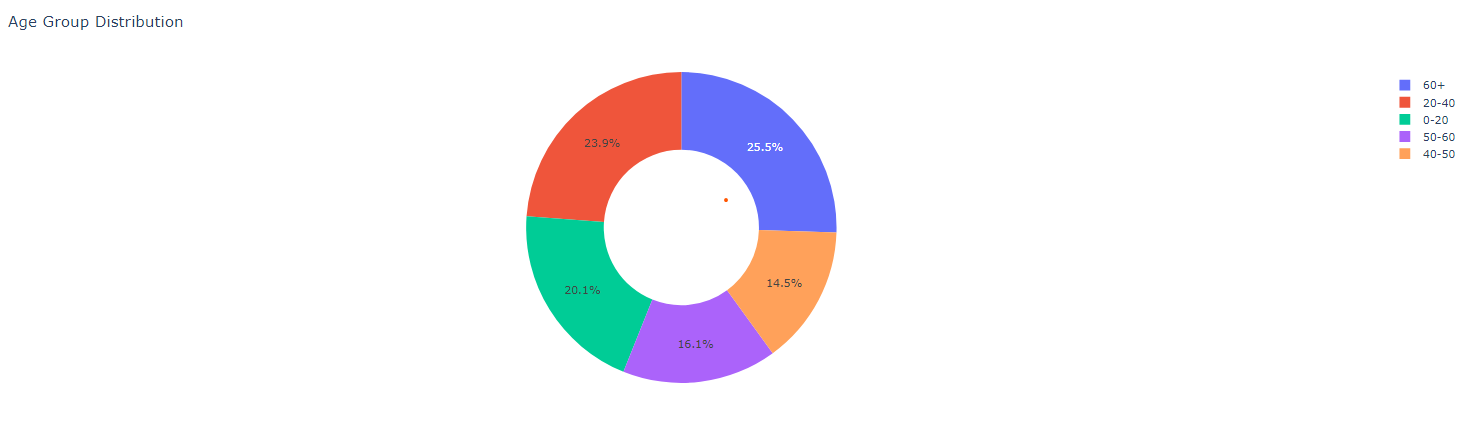

In [218]:
pie_graph(vis_df, 'Gender Distribution','Gender')

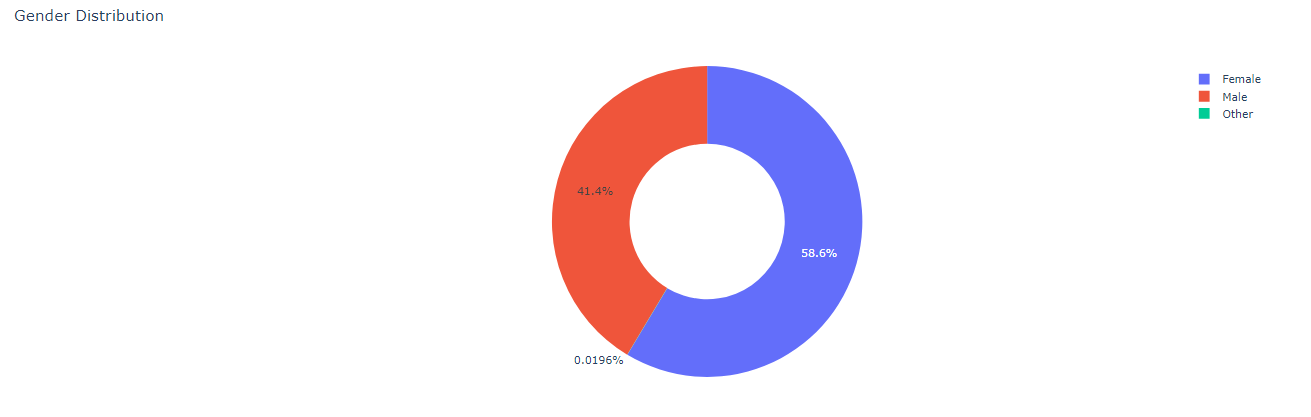

In [219]:
pie_graph(vis_df, 'Hypertension Distribution','Hypertension')

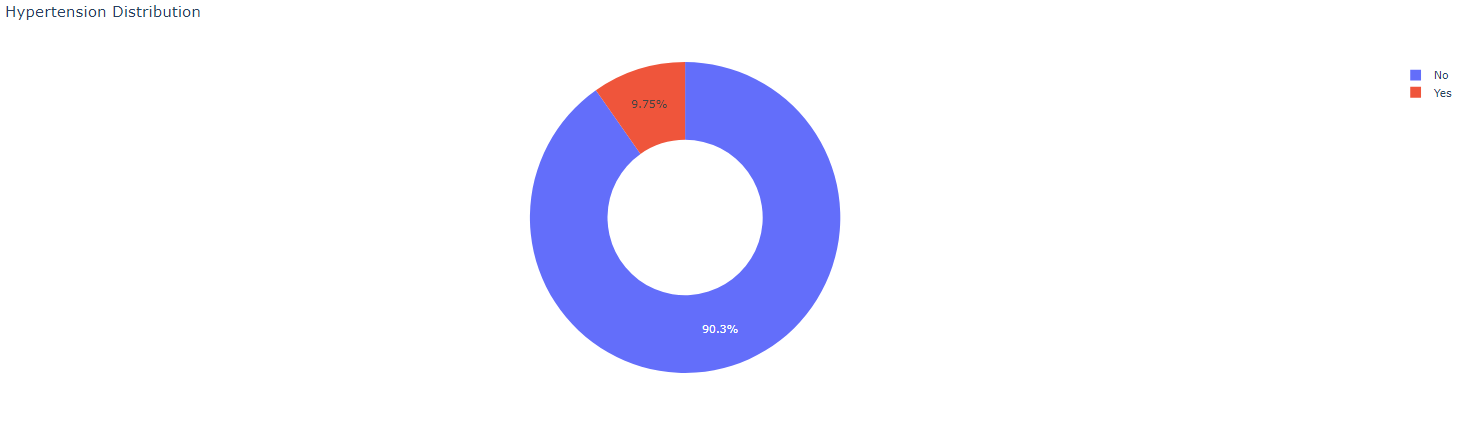

In [220]:
pie_graph(vis_df, ' Heart disease Distribution','Heart_Disease')

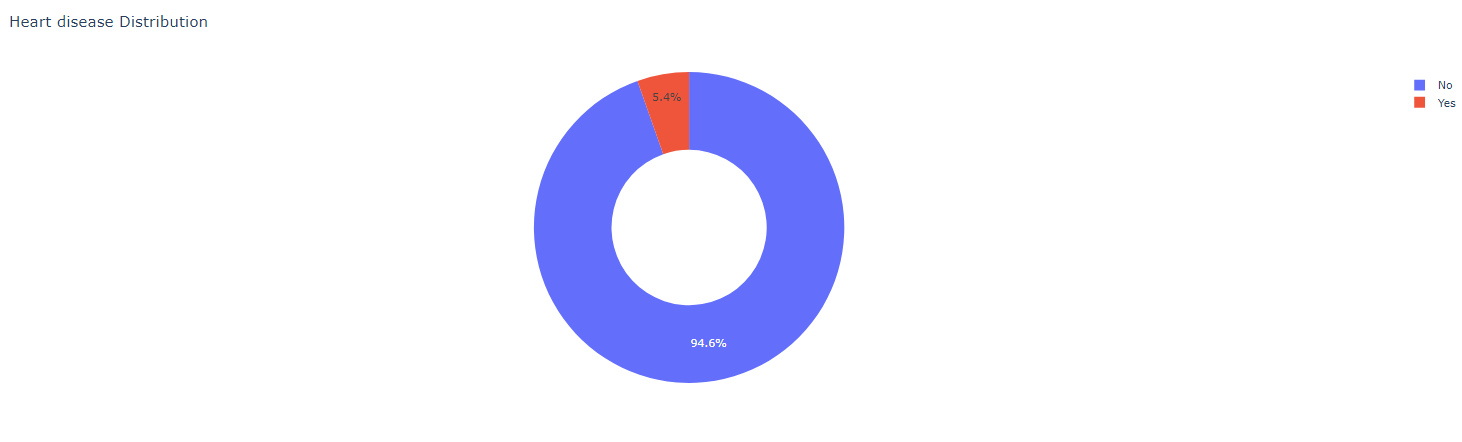

In [221]:
pie_graph(vis_df, 'Ever married  Distribution','Ever_Married')

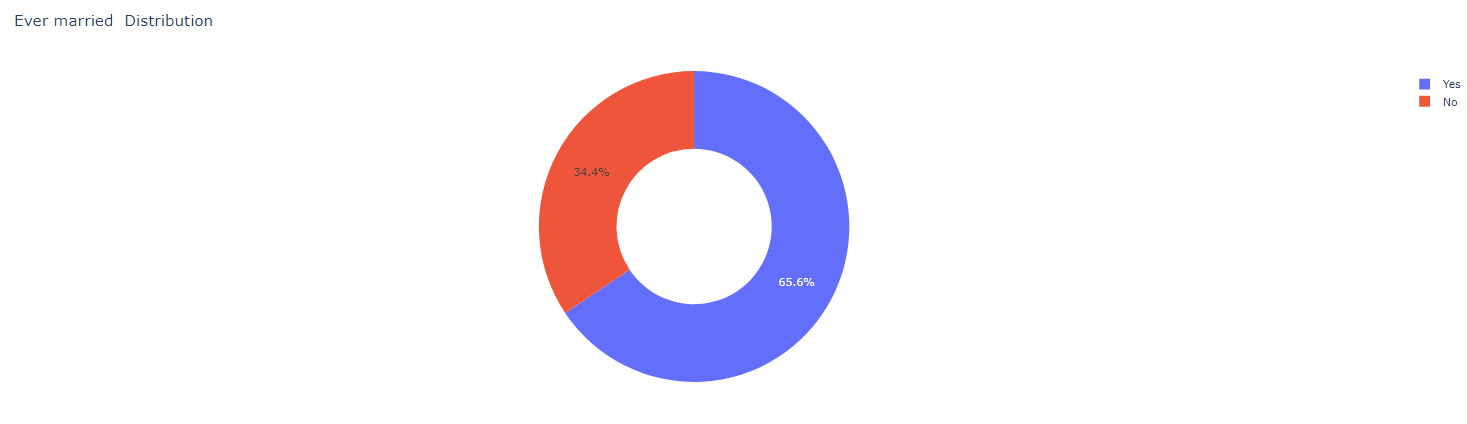

In [222]:
pie_graph(vis_df, 'Work type Distribution','Work_Type')

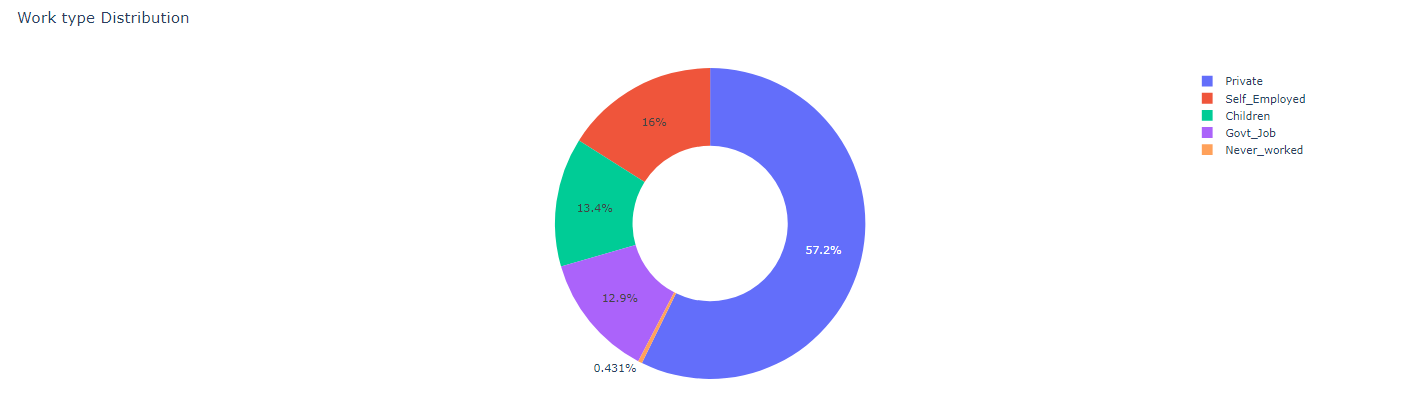

In [223]:
pie_graph(vis_df, 'Residence type Distribution','Residence_Type')

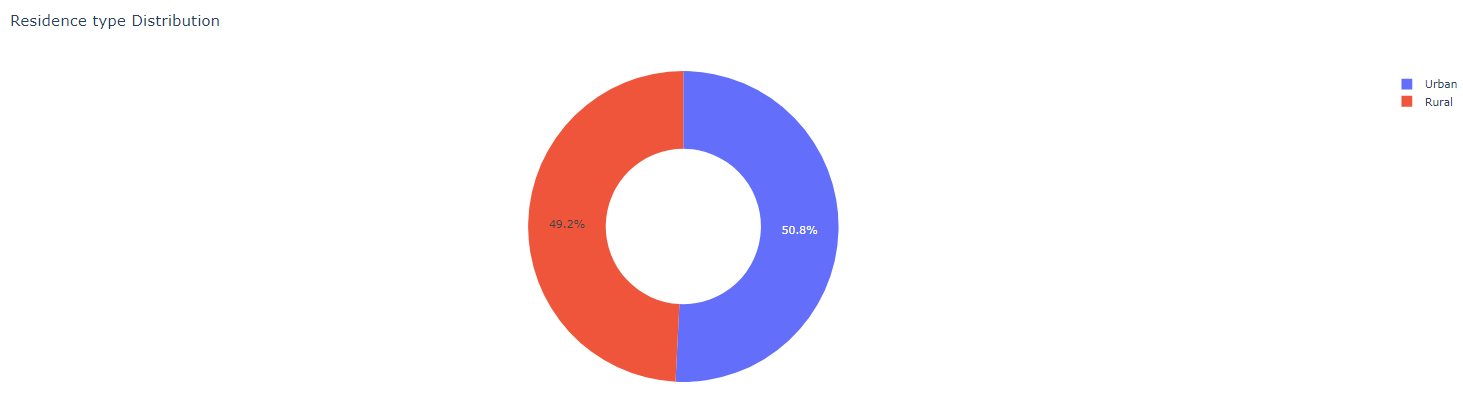

In [224]:
pie_graph(vis_df,'Smoking Status Distribution','Smoking_Status')

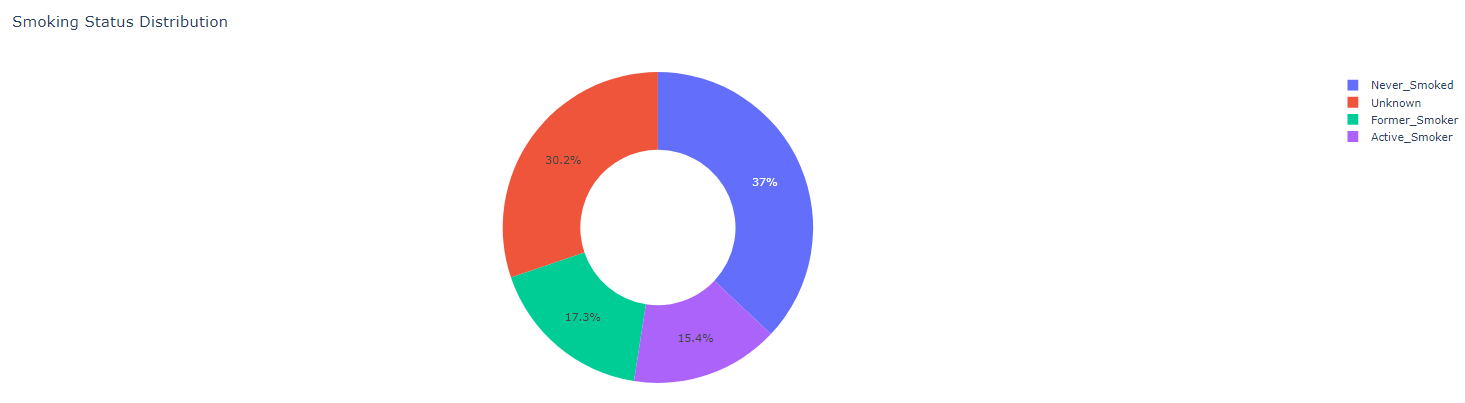

In [225]:
pie_graph(vis_df, 'Stroke Distribution', 'Stroke')

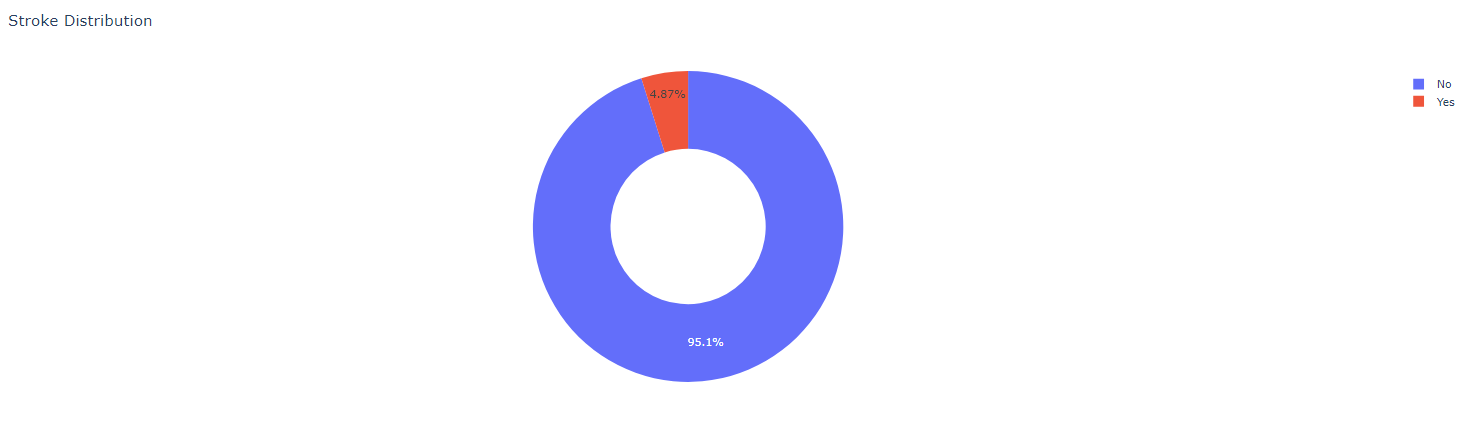

## Multivariate Visualization and Correlations

The Following Graphs are Multivariate visualizations of the target vs some of its features. Doing this kind of visualization allows myself and the reader the ability to get a good understanding of the correlation between the target and its features, and whether or not this correlation relates to any relevant information.

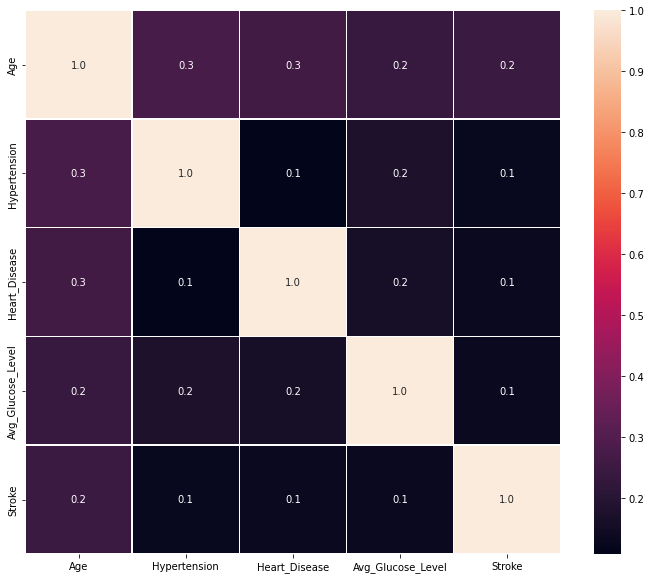

In [226]:
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(),
            annot = True,
            linewidths = .5,
            fmt = '.1f',
            ax = ax)

The heatmap is for a more technical audience, but it is important to note that according to the data no individual feature has an overly strong correlation to the target. The features that have the strongest correlations is individuals have a higher chance for Hypertension and Heart Disease the older they get.

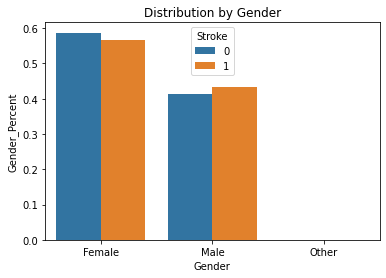

In [227]:
bar_plot(vis_gender_percent,'Gender','Gender_Percent','Stroke','Distribution by Gender')

Men have a slightly higher chance for stroke. 

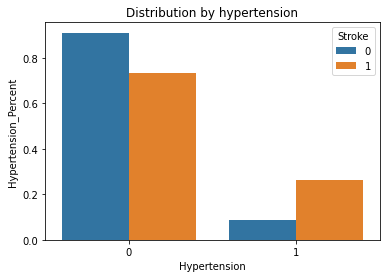

In [228]:
bar_plot(vis_hypertension_percent,'Hypertension','Hypertension_Percent','Stroke','Distribution by hypertension')

Individuals that have Hypertension are at an increased chance to have a stroke compared to individuals that do not have Hypertension.

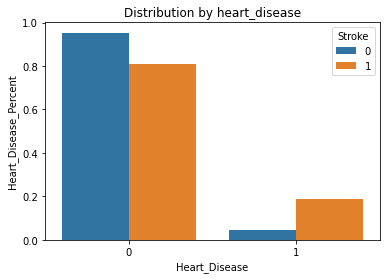

In [229]:
bar_plot(vis_heart_percent,'Heart_Disease','Heart_Disease_Percent','Stroke','Distribution by heart_disease')

Individuals that have Heart Disease are at an increased chance to have a stroke compared to individuals that do not have Heart Disease.

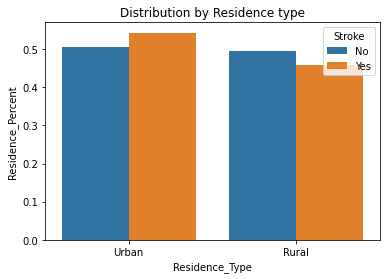

In [230]:
bar_plot(vis_residence_percent,'Residence_Type','Residence_Percent','Stroke','Distribution by Residence type')

It is intersting to note that Residence Type does not appear to any correlation to whether or not an individual has a stroke. 

In [231]:
group = vis_df.groupby(['Stroke','Work_Type'],as_index = False).size().sort_values(by='size')
horizontal_bar_chart(df = group,x = 'Stroke',y = 'size',color = 'Work_Type',title = 'Distribution of stroke by work type')

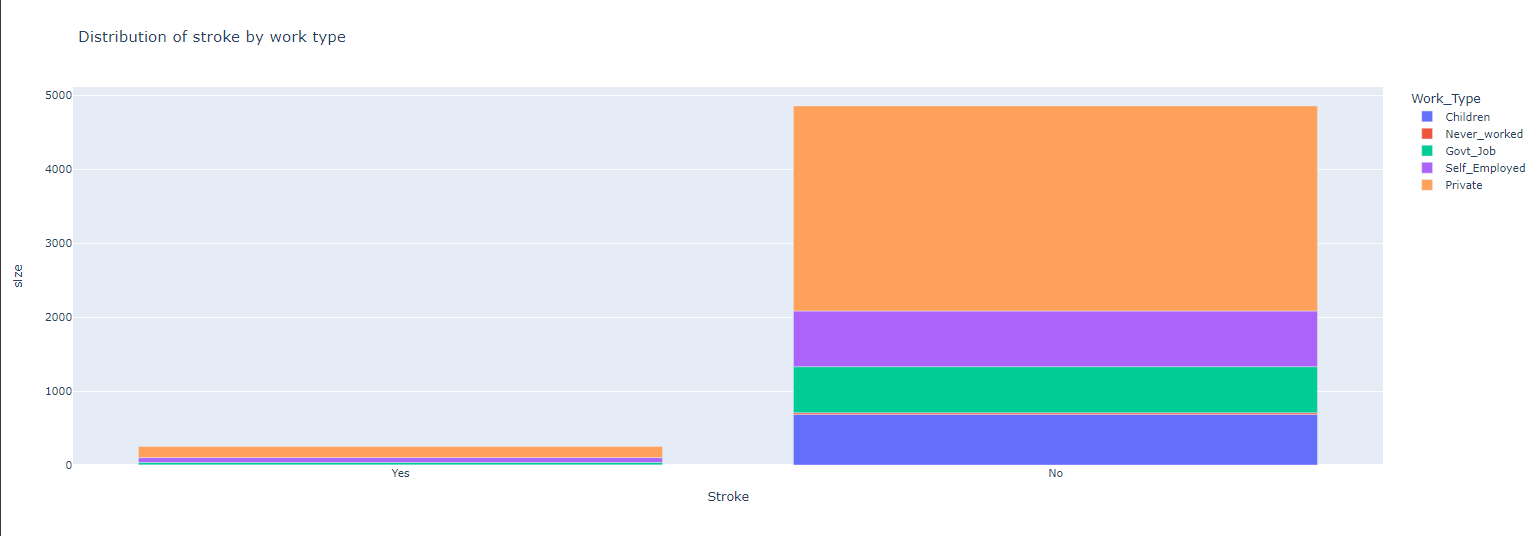

According to the graph individuals that are Self Employed have the strongest correlation to whether or not an individual will have a stroke.

In [232]:
group = vis_df.groupby(['Stroke','Smoking_Status'],as_index = False).size().sort_values(by='size')
horizontal_bar_chart(df = group,x = 'Stroke',y = 'size',color = 'Smoking_Status',title = 'Distribution of stroke by smoking status')

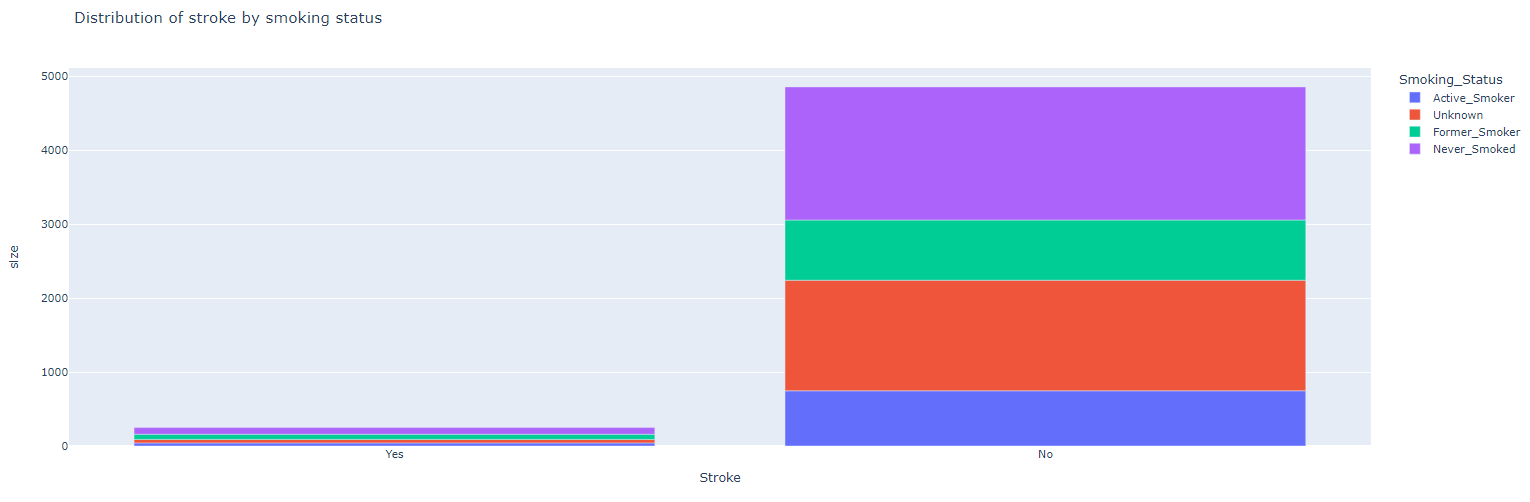

According to the graph individuals that are or were Smokers have the strongest correlation to whether or not an individual will have a stroke.

# **Part 4 EDA (Exploratory Data Analysis)**

**Project 2- Part 4 (Core)**

You are now entering into the model development phase of the project!

- Ensure that you complete the appropriate pre-processing steps

- Try multiple models and tune the hyperparameters of each model to optimize model performance (include all models and hyperparameters tested in addition to the final model)

- Perform PCA or another feature engineering technique on your dataset to see how this impacts your results.  (We encourage you to try multiple techniques depending on your data!)

- Evaluate model performance with appropriate metrics for the model

- Choose your "production" model and justify this decision

- Go back through your code and ensure that you have provided clear comments (remember this is for your portfolio!)

- Update your project readme and describe your final model, your final model evaluation metrics, and explain whether or not your model would be useful in production and if so, how it should be used.

# **Preprocessing and Addition of SMOTE**


In [233]:
# Describe the features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             5110 non-null   object
 1   Age                5110 non-null   int64 
 2   Hypertension       5110 non-null   int64 
 3   Heart_Disease      5110 non-null   int64 
 4   Ever_Married       5110 non-null   object
 5   Work_Type          5110 non-null   object
 6   Residence_Type     5110 non-null   object
 7   Avg_Glucose_Level  5110 non-null   int64 
 8   Smoking_Status     5110 non-null   object
 9   Stroke             5110 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 439.1+ KB


Numeric Features: Age, Hypertension, Heart Disease, Avg Glucose Level, Stroke

Nominal Features: Gender, Ever Married, Work Type, Residence Type, Smoking Status

Ordinal Features: None

I will use one hot encoding on the nominal features because nominal data are variables without any quantitative value.

In [234]:
from imblearn.over_sampling import SMOTE

In [235]:
# Define features (X) and target (y)
X = df.drop(columns = 'Stroke', axis=1)
y = df['Stroke']

In [236]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.isna().any()

Gender               False
Age                  False
Hypertension         False
Heart_Disease        False
Ever_Married         False
Work_Type            False
Residence_Type       False
Avg_Glucose_Level    False
Smoking_Status       False
dtype: bool

In [237]:
#Create Selector
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe
# Tuples for Column Transformer
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
col_transformer
# fit ColumnTransformer on the training data
col_transformer.fit(X_train)
# transform train and test
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (3832, 19)




array([[ 0.73739179,  3.1393509 , -0.24139427, ...,  0.        ,
         1.        ,  0.        ],
       [-0.10710473, -0.31853719, -0.24139427, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.38181431, -0.31853719, -0.24139427, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.84054495, -0.31853719, -0.24139427, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.6263355 , -0.31853719, -0.24139427, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.1151312 , -0.31853719, -0.24139427, ...,  0.        ,
         0.        ,  0.        ]])

In [238]:
# Make a new DataFrame with inputed missing values
X_test_df = pd.DataFrame(X_test_processed)
X_train_df = pd.DataFrame(X_train_processed)

In [239]:
# Check the data for sanity check to verify all changes have been made
display(X_train_df.info())
X_train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3832 non-null   float64
 1   1       3832 non-null   float64
 2   2       3832 non-null   float64
 3   3       3832 non-null   float64
 4   4       3832 non-null   float64
 5   5       3832 non-null   float64
 6   6       3832 non-null   float64
 7   7       3832 non-null   float64
 8   8       3832 non-null   float64
 9   9       3832 non-null   float64
 10  10      3832 non-null   float64
 11  11      3832 non-null   float64
 12  12      3832 non-null   float64
 13  13      3832 non-null   float64
 14  14      3832 non-null   float64
 15  15      3832 non-null   float64
 16  16      3832 non-null   float64
 17  17      3832 non-null   float64
 18  18      3832 non-null   float64
dtypes: float64(19)
memory usage: 568.9 KB


None

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.737392,3.139351,-0.241394,2.823915,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.107105,-0.318537,-0.241394,-0.500218,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.381814,-0.318537,-0.241394,-0.412162,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.515156,-0.318537,-0.241394,-0.940501,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.515156,-0.318537,-0.241394,0.116177,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [240]:
# Check the description of the data
X_test_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,1278.00,1278.00,1278.00,1278.00,1278.00,1278.00,1278.00,1278.00,1278.00,1278.00,1278.00,1278.00,1278.00,1278.0,1278.0,1278.00,1278.00,1278.00,1278.00
mean,-0.03,0.07,-0.02,-0.01,0.59,0.41,0.34,0.66,0.15,0.12,0.00,0.57,0.16,0.5,0.5,0.16,0.17,0.37,0.31
std,1.02,1.10,0.96,0.99,0.49,0.49,0.47,0.47,0.36,0.33,0.04,0.50,0.36,0.5,0.5,0.36,0.37,0.48,0.46
min,-1.88,-0.32,-0.24,-1.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00
25%,-0.86,-0.32,-0.24,-0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00
50%,0.07,-0.32,-0.24,-0.30,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.0,1.0,0.00,0.00,0.00,0.00
75%,0.74,-0.32,-0.24,0.14,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.0,1.0,0.00,0.00,1.00,1.00
max,1.72,3.14,4.14,3.53,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.00,1.00,1.00,1.00


In [241]:
sm = SMOTE(random_state = 42)
X_train_df, y_train = sm.fit_resample(X_train_df, y_train)

# **Models**

## Random Forest Classifier w/ GridSearchCV


Testing-set Accuracy score is: 0.9178403755868545
Training-set Accuracy score is: 1.0
              precision    recall  f1-score   support

   No Stroke       0.94      0.97      0.96      1198
      Stroke       0.20      0.10      0.13        80

    accuracy                           0.92      1278
   macro avg       0.57      0.54      0.54      1278
weighted avg       0.90      0.92      0.91      1278



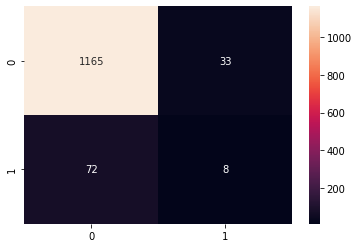

In [242]:
# Build Random Forest Classifier and Evaluate the Model
clf_rf = RandomForestClassifier(random_state=777)
clf_rf = clf_rf.fit(X_train_df,y_train)
y_pred_rf = clf_rf.predict(X_test_df)
acc = accuracy_score(y_test, y_pred_rf)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,clf_rf.predict(X_train_df)))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, fmt = "d")
target_names = ['No Stroke', 'Stroke']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

In [243]:
pipe_param_grid = {'max_depth': list(range(10, 15)),
                   'max_features': list(range(0,14))}
clf_rf_gs = GridSearchCV(clf_rf, pipe_param_grid)
clf_rf_gs.fit(X_train_df, y_train)
print('Best RFC Parameters:')
print(clf_rf_gs.best_params_)
best_pipe = clf_rf_gs.best_estimator_
print(f'Accuracy of best RFC model is: {best_pipe.score(X_test_df, y_test)}')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


25 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/pa

Best RFC Parameters:
{'max_depth': 14, 'max_features': 5}
Accuracy of best RFC model is: 0.9045383411580594


Testing-set Accuracy score is: 0.9045383411580594
Training-set Accuracy score is: 0.9853944853944854
              precision    recall  f1-score   support

   No Stroke       0.94      0.95      0.95      1198
      Stroke       0.18      0.15      0.16        80

    accuracy                           0.90      1278
   macro avg       0.56      0.55      0.56      1278
weighted avg       0.90      0.90      0.90      1278



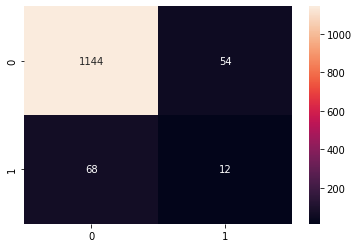

In [244]:
y_pred_rf_gs = best_pipe.predict(X_test_df)
acc = accuracy_score(y_test, y_pred_rf_gs)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,best_pipe.predict(X_train_df)))
cm = confusion_matrix(y_test, y_pred_rf_gs)
sns.heatmap(cm, annot = True, fmt = "d")
target_names = ['No Stroke', 'Stroke']
print(classification_report(y_test, y_pred_rf_gs, target_names=target_names))

##Ada Boosting

AdaBoost Classifier Model Accuracy is: 0.8278560250391236
              precision    recall  f1-score   support

   No Stroke       0.96      0.85      0.90      1198
      Stroke       0.19      0.53      0.28        80

    accuracy                           0.83      1278
   macro avg       0.58      0.69      0.59      1278
weighted avg       0.92      0.83      0.86      1278



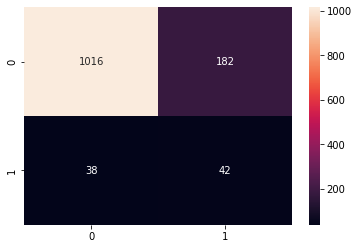

In [245]:
# Build Ada Boost Classifer and Evaluate the Model
abc = AdaBoostClassifier(n_estimators = 50,
                         learning_rate = 1, 
                         random_state = 777)
abc.fit(X_train_df,y_train)
y_pred_abc = abc.predict(X_test_df)
acc = accuracy_score(y_test, y_pred_abc)
print('AdaBoost Classifier Model Accuracy is:',acc)
cm = confusion_matrix(y_test, y_pred_abc)
sns.heatmap(cm, annot = True, fmt="d")
target_names = ['No Stroke', 'Stroke']
print(classification_report(y_test, y_pred_abc, target_names=target_names))

##Gradient Boosting

Gradient Boosting Classifier Model Accuracy score is: 0.8873239436619719
              precision    recall  f1-score   support

   No Stroke       0.95      0.93      0.94      1198
      Stroke       0.20      0.28      0.23        80

    accuracy                           0.89      1278
   macro avg       0.58      0.60      0.59      1278
weighted avg       0.90      0.89      0.90      1278



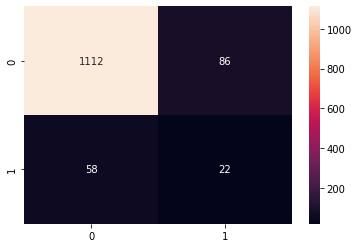

In [246]:
# Build Gradient Boosting Classifier and Evaluate the Model
gb = GradientBoostingClassifier()
gb.fit(X_train_df, y_train)
gb_pred = gb.predict(X_test_df)
acc = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Classifier Model Accuracy score is:", acc)
cm = confusion_matrix(y_test, gb_pred)
sns.heatmap(cm, annot = True, fmt="d")
target_names = ['No Stroke', 'Stroke']
print(classification_report(y_test, gb_pred, target_names=target_names))

##LightGBM

Gradient Boosting Classifier Model Accuracy score is: 0.917057902973396
              precision    recall  f1-score   support

   No Stroke       0.94      0.97      0.96      1198
      Stroke       0.14      0.06      0.09        80

    accuracy                           0.92      1278
   macro avg       0.54      0.52      0.52      1278
weighted avg       0.89      0.92      0.90      1278



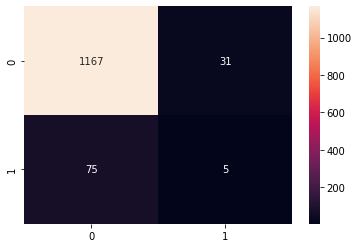

In [247]:
# Build LightGBM Classifier and Evaluate the Model
lgbm = LGBMClassifier()
lgbm.fit(X_train_df, y_train)
lgbm_pred = lgbm.predict(X_test_df)
acc = accuracy_score(y_test, lgbm_pred)
print("Gradient Boosting Classifier Model Accuracy score is:", acc)
cm = confusion_matrix(y_test, lgbm_pred)
sns.heatmap(cm, annot = True, fmt="d")
target_names = ['No Stroke', 'Stroke']
print(classification_report(y_test, lgbm_pred, target_names=target_names))

##XGBoost

Gradient Boosting Classifier Model Accuracy score is: 0.8748043818466353
              precision    recall  f1-score   support

   No Stroke       0.95      0.91      0.93      1198
      Stroke       0.18      0.28      0.22        80

    accuracy                           0.87      1278
   macro avg       0.56      0.59      0.57      1278
weighted avg       0.90      0.87      0.89      1278



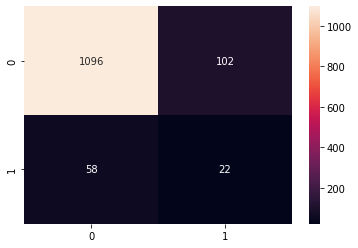

In [248]:
# Build XGBClassifier and Evaluate the Model
xgb = XGBClassifier()
xgb.fit(X_train_df, y_train)
xgb_pred = xgb.predict(X_test_df)
acc = accuracy_score(y_test, xgb_pred)
print("Gradient Boosting Classifier Model Accuracy score is:", acc)
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot = True, fmt="d")
target_names = ['No Stroke', 'Stroke']
print(classification_report(y_test, xgb_pred, target_names=target_names))

##SVC (Support Vector Classifier)

SVC Accuracy score is: 0.8153364632237872
              precision    recall  f1-score   support

   No Stroke       0.97      0.83      0.89      1198
      Stroke       0.18      0.55      0.27        80

    accuracy                           0.82      1278
   macro avg       0.57      0.69      0.58      1278
weighted avg       0.92      0.82      0.86      1278



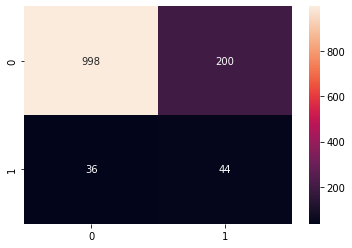

In [249]:
# Build SVC Model and Evaluate the Model
svc = SVC(random_state = 777)
svc.fit(X_train_df, y_train)
svc_pred = svc.predict(X_test_df)
acc = svc.score(X_test_df, y_test)
print("SVC Accuracy score is:", acc)
cm = confusion_matrix(y_test, svc_pred)
sns.heatmap(cm, annot = True, fmt = "d")
target_names = ['No Stroke', 'Stroke']
print(classification_report(y_test, svc_pred, target_names=target_names))

## KNN Model w/ Best K and GridSearchCV


KNN Model Acuuracy is: 0.8043818466353677
              precision    recall  f1-score   support

   No Stroke       0.96      0.82      0.89      1198
      Stroke       0.16      0.51      0.25        80

    accuracy                           0.80      1278
   macro avg       0.56      0.67      0.57      1278
weighted avg       0.91      0.80      0.85      1278



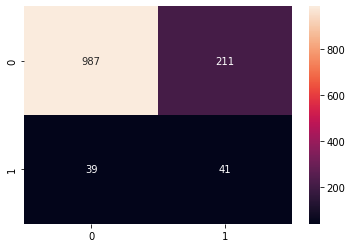

In [250]:
# Build KNN Model and Evaluate the Model
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_df, y_train)
knn_pred = knn.predict(X_test_df)
acc = knn.score(X_test_df, y_test)
print("KNN Model Acuuracy is:", acc)
cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot = True, fmt="d")
target_names = ['No Stroke', 'Stroke']
print(classification_report(y_test, knn_pred, target_names=target_names))

In [251]:
# Tune Model to try to Find Best K
krange = range(1, 50)
test_accuracies = []
bestacc = 0
bestk = 0
for k in krange:
  #find accuracy for each k
  pipe = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=k))
  pipe.fit(X_train_df, y_train)
  acc = accuracy_score(y_test, pipe.predict(X_test_df))
  #if accuracy for this k is better than previous accuracies, set bestk = k
  if acc > bestacc:
    bestacc = acc
    bestk = k

  test_accuracies.append(acc)

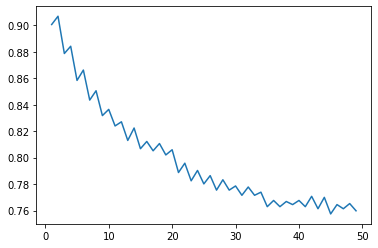

In [252]:
# Plot accuracies over K
plt.plot(krange, test_accuracies, label='Test K Scores')
plt.show()

In [253]:
# Print best k and best accuracy
print(f'Best K value is {bestk} \nwith {bestacc} accuracy on the test set')

Best K value is 2 
with 0.906885758998435 accuracy on the test set


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



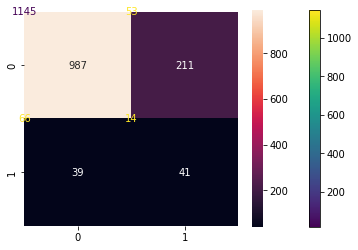

In [254]:
# Create new model with best k
knn_final_pipe = make_pipeline(col_transformer, 
                               KNeighborsClassifier(n_neighbors = bestk))
knn_final_pipe.fit(X_train_df, y_train)
# Display confusion matrix for KNN with best k
plot_confusion_matrix(knn_final_pipe, X_test_df, y_test)
sns.heatmap(cm, annot = True, fmt = "d")

In [255]:
pipe_param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [256]:
knn_pipe_gs = GridSearchCV(knn_final_pipe, pipe_param_grid)

knn_pipe_gs.fit(X_train_df, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test_df, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}
Accuracy of best KNN model is: 0.8990610328638498


Testing-set Accuracy score is: 0.8990610328638498
Training-set Accuracy score is: 1.0
              precision    recall  f1-score   support

   No Stroke       0.95      0.95      0.95      1198
      Stroke       0.19      0.19      0.19        80

    accuracy                           0.90      1278
   macro avg       0.57      0.57      0.57      1278
weighted avg       0.90      0.90      0.90      1278



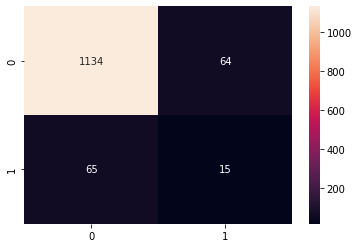

In [257]:
y_pred_knn_pipe_gs = best_pipe.predict(X_test_df)
acc = accuracy_score(y_test, y_pred_knn_pipe_gs)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,best_pipe.predict(X_train_df)))
cm = confusion_matrix(y_test, y_pred_knn_pipe_gs)
sns.heatmap(cm, annot = True, fmt = "d")
target_names = ['No Stroke', 'Stroke']
print(classification_report(y_test, y_pred_knn_pipe_gs, target_names=target_names))

## Log Reg Model w/ L1 and L2 Tuning

LogisticRegression accuracy score is: 0.7582159624413145
              precision    recall  f1-score   support

   No Stroke       0.98      0.76      0.85      1198
      Stroke       0.17      0.72      0.27        80

    accuracy                           0.76      1278
   macro avg       0.57      0.74      0.56      1278
weighted avg       0.93      0.76      0.82      1278



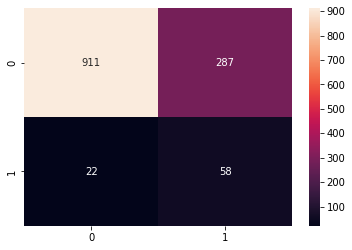

In [258]:
# Build Log Reg Model and Evaluate the Model
lr = LogisticRegression()
lr.fit(X_train_df, y_train)
lr_pred = lr.predict(X_test_df)
acc = lr.score(X_test_df, y_test)
print("LogisticRegression accuracy score is:",acc)
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot = True, fmt = "d")
target_names = ['No Stroke', 'Stroke']
report = classification_report(y_test, lr_pred, target_names=target_names)
print(report)

{0.0001: 0.9374021909233177,
 0.001: 0.7050078247261345,
 0.01: 0.7347417840375586,
 0.1: 0.7535211267605634,
 1: 0.7574334898278561,
 10: 0.7574334898278561,
 100: 0.7574334898278561,
 1000: 0.7574334898278561}

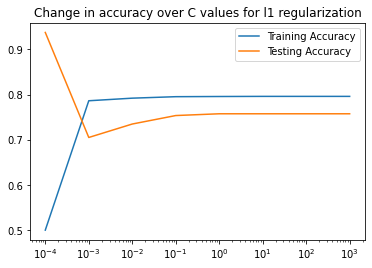

In [259]:
# L1 tuning

# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(col_transformer, log_reg)
  log_reg_pipe.fit(X_train_df, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_df, y_train))
  test_scores.append(log_reg_pipe.score(X_test_df, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.6666666666666666,
 0.001: 0.729264475743349,
 0.01: 0.7527386541471048,
 0.1: 0.7566510172143975,
 1: 0.7574334898278561,
 10: 0.7574334898278561,
 100: 0.7574334898278561,
 1000: 0.7574334898278561}

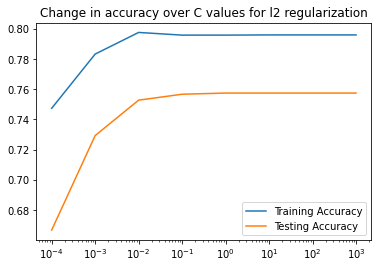

In [260]:
# L2 tuning

# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(col_transformer, log_reg)
  log_reg_pipe.fit(X_train_df, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_df, y_train))
  test_scores.append(log_reg_pipe.score(X_test_df, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

## Decision Tree Classifier

Decision Tree accuracy score is : 0.8810641627543035
              precision    recall  f1-score   support

   No Stroke       0.94      0.93      0.94      1198
      Stroke       0.12      0.15      0.14        80

    accuracy                           0.88      1278
   macro avg       0.53      0.54      0.54      1278
weighted avg       0.89      0.88      0.89      1278



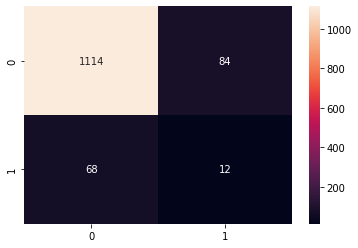

In [261]:
# Build Decision Tree Classifier and Evaluate the Model
dt = DecisionTreeClassifier()
dt.fit(X_train_df, y_train)
dt_pred = dt.predict(X_test_df)
acc = accuracy_score(y_test, dt_pred)
print("Decision Tree accuracy score is :",acc)
cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot = True, fmt = "d")
target_names = ['No Stroke', 'Stroke']
print(classification_report(y_test, dt_pred, target_names=target_names))

## Soft Voting Classifier Model

Voting Classifier Accuracy Score is: 
0.8513302034428795
              precision    recall  f1-score   support

   No Stroke       0.96      0.88      0.92      1198
      Stroke       0.20      0.47      0.29        80

    accuracy                           0.85      1278
   macro avg       0.58      0.68      0.60      1278
weighted avg       0.91      0.85      0.88      1278



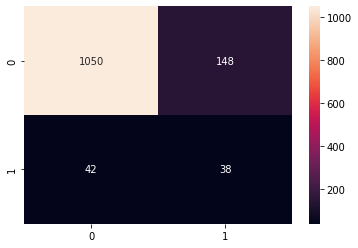

In [262]:
clf1 = LogisticRegression(max_iter = 1000)
clf2 = RandomForestClassifier()
clf3 =  KNeighborsClassifier(n_neighbors = 10)
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rfc', clf2), ('knn', clf3)], voting='soft')
eclf1.fit(X_train_df, y_train)
vcm_pred = eclf1.predict(X_test_df)
print("Voting Classifier Accuracy Score is: ")
print(accuracy_score(y_test, vcm_pred))
cm = confusion_matrix(y_test, vcm_pred)
sns.heatmap(cm, annot = True, fmt="d")
target_names = ['No Stroke', 'Stroke']
print(classification_report(y_test, vcm_pred, target_names=target_names))

In [263]:
# Cross_val_score for Accuracy 
c = []
c.append(cross_val_score(clf1,X_train_df,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf2,X_train_df,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf3,X_train_df,y_train,scoring='accuracy',cv=10).mean())
print(c)

[0.7952526856469782, 0.9630137394791968, 0.8846584513079716]


# **PCA (Principal Component Analysis) w/ KNN Model and GridSearchCV**

In [264]:
# Instantiate Standard Scaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X_train_df)

In [265]:
# Apply PCA

# Instantiate, fit & transform data using PCA
pca = PCA(n_components=.95)
pcs = pca.fit_transform(scaled_df)

In [266]:
# Create and fit the model
knn_pipe = make_pipeline(scaler, KNeighborsClassifier())
knn_pipe.fit(X_train_df, y_train)
# Evaluate the model using classification_report
print(classification_report(y_test, knn_pipe.predict(X_test_df)))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1198
           1       0.18      0.36      0.24        80

    accuracy                           0.86      1278
   macro avg       0.57      0.63      0.58      1278
weighted avg       0.91      0.86      0.88      1278



In [267]:
knn_pipe_gs2 = GridSearchCV(knn_pipe, pipe_param_grid)

knn_pipe_gs2.fit(X_train_df, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs2.best_params_)
best_pipe = knn_pipe_gs2.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test_df, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}
Accuracy of best KNN model is: 0.8990610328638498


Testing-set Accuracy score is: 0.8990610328638498
Training-set Accuracy score is: 1.0
              precision    recall  f1-score   support

   No Stroke       0.95      0.95      0.95      1198
      Stroke       0.19      0.19      0.19        80

    accuracy                           0.90      1278
   macro avg       0.57      0.57      0.57      1278
weighted avg       0.90      0.90      0.90      1278



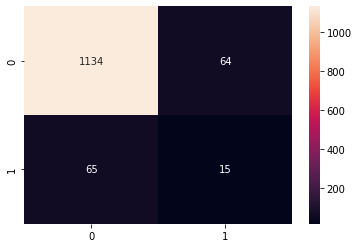

In [268]:
y_pred_knn_pipe_gs2 = knn_pipe_gs2.predict(X_test_df)
acc = accuracy_score(y_test, y_pred_knn_pipe_gs2)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,knn_pipe_gs2.predict(X_train_df)))
cm = confusion_matrix(y_test, y_pred_knn_pipe_gs2)
sns.heatmap(cm, annot = True, fmt = "d")
target_names = ['No Stroke', 'Stroke']
print(classification_report(y_test, y_pred_knn_pipe_gs2, target_names=target_names))

# **Feature Engineering (Column Transformation) w/ SMOTE, Random Forest Classifier w/ GridSearchCV and Gradient Boosting**

## Preprocessing

For a feature engineering exercise I will add the columns of Heart Disease and Hyptension together. I feel this would be a good choice because in the newly formed column we will have a scenario where an individual could have zero cardiovascular issues (0), and where an individual has both cardiovascular issues (2). I'm hoping this segmentation shows some difference.

In [269]:
# Make a new datafame
df2= '/content/healthcare-dataset-stroke-data.csv'
df2= pd.read_csv(df2, index_col=0)
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [270]:
# Rename Columns to Clean Things Up
df2.rename(columns = {'gender':'Gender', 'age':'Age', 'hypertension':'Hypertension', 'heart_disease':'Heart_Disease', 'ever_married':'Ever_Married', 'work_type':'Work_Type', 'Residence_type':'Residence_Type', 'avg_glucose_level':'Avg_Glucose_Level', 'bmi':'BMI', 'smoking_status':'Smoking_Status', 'stroke':'Stroke'}, inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             5110 non-null   object 
 1   Age                5110 non-null   float64
 2   Hypertension       5110 non-null   int64  
 3   Heart_Disease      5110 non-null   int64  
 4   Ever_Married       5110 non-null   object 
 5   Work_Type          5110 non-null   object 
 6   Residence_Type     5110 non-null   object 
 7   Avg_Glucose_Level  5110 non-null   float64
 8   BMI                4909 non-null   float64
 9   Smoking_Status     5110 non-null   object 
 10  Stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [271]:
# Check for Duplicates
df2.duplicated().sum()

0

In [272]:
# Identify and address any missing values in this dataset. 
df2.isna().sum()

Gender                 0
Age                    0
Hypertension           0
Heart_Disease          0
Ever_Married           0
Work_Type              0
Residence_Type         0
Avg_Glucose_Level      0
BMI                  201
Smoking_Status         0
Stroke                 0
dtype: int64

In [273]:
# Drop BMI column
df2 = df2.drop(columns=['BMI'])
df2.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Smoking_Status,Stroke
id,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1


In [274]:
# Round the Age column
df2['Age'] = df2['Age'].apply(np.ceil)
df2['Age'] = df2['Age'].apply(np.int64) 
df2['Age'].unique()

array([67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 54, 50, 64, 75, 60, 57, 71,
       52, 82, 65, 58, 42, 48, 72, 63, 76, 39, 77, 73, 56, 45, 70, 66, 51,
       43, 68, 47, 53, 38, 55,  2, 46, 32, 14,  3,  8, 37, 40, 35, 20, 44,
       25, 27, 23, 17, 13,  4, 16, 22, 30, 29, 11, 21, 18, 33, 24, 34, 36,
        1, 41,  5, 26, 31,  7, 12, 62,  9, 15, 28, 10, 19,  6])

In [275]:
# Round the Avg_Glucose_Level
df2['Avg_Glucose_Level'] = df2['Avg_Glucose_Level'].apply(np.ceil) 
df2['Avg_Glucose_Level'] = df2['Avg_Glucose_Level'].apply(np.int64) 
df2['Avg_Glucose_Level'].unique()

array([229, 203, 106, 172, 175, 187,  71,  95,  77,  59,  81, 121, 105,
       220, 215, 168, 192, 222,  90, 218, 194, 234, 209, 103, 101, 190,
       196, 212, 213,  84, 197, 253,  85,  75,  93,  61,  79,  72, 145,
        91, 214, 244, 110, 108, 100,  76, 128, 125, 198,  60, 238, 195,
       181, 186,  62,  94, 114,  87,  73,  63, 180, 117,  97,  67, 241,
       111, 166, 144, 102,  89,  80, 112,  99, 227,  69,  65, 236,  83,
       191, 232,  74, 130, 107, 225, 217, 260, 250, 132, 201, 131, 183,
       207, 264, 141, 208, 200, 104, 152,  68, 240, 170, 224,  78,  58,
        82, 204, 134, 163,  92,  98,  57, 113, 138, 216, 210, 206, 119,
       272, 243, 115, 176,  88, 135,  96, 211, 251, 185, 219, 248,  70,
       162,  86, 199,  56, 150, 118, 142, 147, 221, 116, 235, 230, 139,
       137, 127,  64, 252, 124, 123, 179, 148, 140, 226, 228, 146, 202,
       171, 133,  66, 184, 109, 156, 164, 189, 205, 126, 159, 149, 157,
       122, 120, 223, 129, 174, 153, 255, 161, 136, 160, 237, 14

In [276]:
# Replace with correct values
df2['Work_Type']= df2['Work_Type'].replace('Self-employed', 'Self_Employed')
df2['Work_Type']= df2['Work_Type'].replace('children', 'Children')
df2['Work_Type']= df2['Work_Type'].replace('Govt_job', 'Govt_Job')
df2['Work_Type']= df2['Work_Type'].replace('Never_worked ', 'Never_Worked')
df2['Work_Type'].value_counts()

Private          2925
Self_Employed     819
Children          687
Govt_Job          657
Never_worked       22
Name: Work_Type, dtype: int64

In [277]:
# Replace with correct values
df2['Smoking_Status']= df2['Smoking_Status'].replace('never smoked', 'Never_Smoked')
df2['Smoking_Status']= df2['Smoking_Status'].replace('formerly smoked', 'Former_Smoker')
df2['Smoking_Status']= df2['Smoking_Status'].replace('smokes', 'Active_Smoker')
df2['Smoking_Status'].value_counts()

Never_Smoked     1892
Unknown          1544
Former_Smoker     885
Active_Smoker     789
Name: Smoking_Status, dtype: int64

In [278]:
df2.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Smoking_Status,Stroke
id,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,229,Former_Smoker,1
51676,Female,61,0,0,Yes,Self_Employed,Rural,203,Never_Smoked,1
31112,Male,80,0,1,Yes,Private,Rural,106,Never_Smoked,1
60182,Female,49,0,0,Yes,Private,Urban,172,Active_Smoker,1
1665,Female,79,1,0,Yes,Self_Employed,Rural,175,Never_Smoked,1


In [279]:
# Add the Hypertension and the Heart Disease Columns together
df2['Hyptension_and_Heart_Disease'] = df2['Hypertension'] + df2['Heart_Disease'] 
df2 = df2.drop(['Hypertension', 'Heart_Disease'], axis=1)
df2.head()

,Gender,Age,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Smoking_Status,Stroke,Hyptension_and_Heart_Disease
id,,,,,,,,,
9046,Male,67,Yes,Private,Urban,229,Former_Smoker,1,1
51676,Female,61,Yes,Self_Employed,Rural,203,Never_Smoked,1,0
31112,Male,80,Yes,Private,Rural,106,Never_Smoked,1,1
60182,Female,49,Yes,Private,Urban,172,Active_Smoker,1,0
1665,Female,79,Yes,Self_Employed,Rural,175,Never_Smoked,1,1


In [280]:
# Check values for the Hyptension_and_Heart_Disease column
df2['Hyptension_and_Heart_Disease'].unique()

array([1, 0, 2])

In [281]:
# Define features (X) and target (y)
X = df2.drop(columns = 'Stroke', axis=1)
y = df2['Stroke']

In [282]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.isna().any()

Gender                          False
Age                             False
Ever_Married                    False
Work_Type                       False
Residence_Type                  False
Avg_Glucose_Level               False
Smoking_Status                  False
Hyptension_and_Heart_Disease    False
dtype: bool

In [283]:
#Create Selector
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
# Tuples for Column Transformer
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
# fit ColumnTransformer on the training data
col_transformer.fit(X_train)
# Transform train and test
X_train_processed_df2 = col_transformer.transform(X_train)
X_test_processed_df2 = col_transformer.transform(X_test)
# Make a new DataFrame with inputed missing values
X_test_df2 = pd.DataFrame(X_test_processed)
X_train_df2 = pd.DataFrame(X_train_processed)
# Check the data for sanity check to verify all changes have been made
display(X_train_df2.info())
X_train_df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3832 non-null   float64
 1   1       3832 non-null   float64
 2   2       3832 non-null   float64
 3   3       3832 non-null   float64
 4   4       3832 non-null   float64
 5   5       3832 non-null   float64
 6   6       3832 non-null   float64
 7   7       3832 non-null   float64
 8   8       3832 non-null   float64
 9   9       3832 non-null   float64
 10  10      3832 non-null   float64
 11  11      3832 non-null   float64
 12  12      3832 non-null   float64
 13  13      3832 non-null   float64
 14  14      3832 non-null   float64
 15  15      3832 non-null   float64
 16  16      3832 non-null   float64
 17  17      3832 non-null   float64
 18  18      3832 non-null   float64
dtypes: float64(19)
memory usage: 568.9 KB


None

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.737392,3.139351,-0.241394,2.823915,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.107105,-0.318537,-0.241394,-0.500218,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.381814,-0.318537,-0.241394,-0.412162,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.515156,-0.318537,-0.241394,-0.940501,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.515156,-0.318537,-0.241394,0.116177,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [284]:
sm = SMOTE(random_state = 42)
X_train_df2, y_train = sm.fit_resample(X_train_df2, y_train)

## Random Forest Classifier w/ GridSearchCV

Testing-set Accuracy score is: 0.9178403755868545
Training-set Accuracy score is: 1.0
              precision    recall  f1-score   support

   No Stroke       0.94      0.97      0.96      1198
      Stroke       0.20      0.10      0.13        80

    accuracy                           0.92      1278
   macro avg       0.57      0.54      0.54      1278
weighted avg       0.90      0.92      0.91      1278



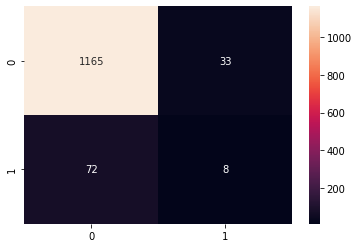

In [285]:
# Build Random Forest Classifier and Evaluate the Model
clf_rf2 = RandomForestClassifier(random_state=777)
clf_rf2 = clf_rf.fit(X_train_df2,y_train)
y_pred_rf2 = clf_rf2.predict(X_test_df2)
acc = accuracy_score(y_test, y_pred_rf2)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,clf_rf2.predict(X_train_df2)))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, fmt = "d")
target_names = ['No Stroke', 'Stroke']
print(classification_report(y_test, y_pred_rf2, target_names=target_names))

In [286]:
pipe_param_grid = {'max_depth': list(range(10, 15)),
                   'max_features': list(range(0,14))}
clf_rf_gs2 = GridSearchCV(clf_rf2, pipe_param_grid)
clf_rf_gs2.fit(X_train_df2, y_train)
print('Best RFC Parameters:')
print(clf_rf_gs2.best_params_)
best_pipe = clf_rf_gs2.best_estimator_
print(f'Accuracy of best RFC model is: {best_pipe.score(X_test_df2, y_test)}')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


25 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/pa

Best RFC Parameters:
{'max_depth': 14, 'max_features': 5}
Accuracy of best RFC model is: 0.9045383411580594


Testing-set Accuracy score is: 0.9045383411580594
Training-set Accuracy score is: 0.9853944853944854
              precision    recall  f1-score   support

   No Stroke       0.94      0.95      0.95      1198
      Stroke       0.18      0.15      0.16        80

    accuracy                           0.90      1278
   macro avg       0.56      0.55      0.56      1278
weighted avg       0.90      0.90      0.90      1278



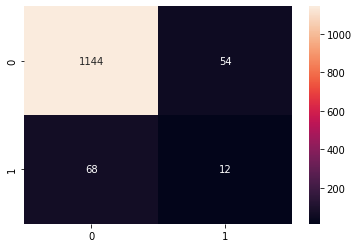

In [287]:
y_pred_rf_gs2 = best_pipe.predict(X_test_df2)
acc = accuracy_score(y_test, y_pred_rf_gs2)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,best_pipe.predict(X_train_df2)))
cm = confusion_matrix(y_test, y_pred_rf_gs2)
sns.heatmap(cm, annot = True, fmt = "d")
target_names = ['No Stroke', 'Stroke']
print(classification_report(y_test, y_pred_rf_gs2, target_names=target_names))

## Gradient Boosting Classifier

Gradient Boosting Classifier Model Accuracy score is: 0.8873239436619719
              precision    recall  f1-score   support

   No Stroke       0.95      0.93      0.94      1198
      Stroke       0.20      0.28      0.23        80

    accuracy                           0.89      1278
   macro avg       0.58      0.60      0.59      1278
weighted avg       0.90      0.89      0.90      1278



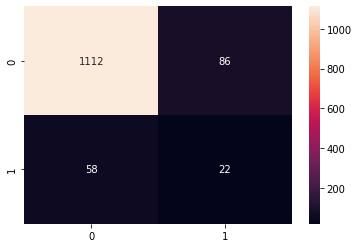

In [288]:
# Build Gradient Boosting Classifier and Evaluate the Model
gb2 = GradientBoostingClassifier()
gb2.fit(X_train_df2, y_train)
gb_pred2 = gb2.predict(X_test_df2)
acc = accuracy_score(y_test, gb_pred2)
print("Gradient Boosting Classifier Model Accuracy score is:", acc)
cm = confusion_matrix(y_test, gb_pred2)
sns.heatmap(cm, annot = True, fmt="d")
target_names = ['No Stroke', 'Stroke']
print(classification_report(y_test, gb_pred2, target_names=target_names))

#**Clustering w/ Kmeans and Visuals**

## Preprocessing

In [358]:
# Load dataset 
df3= '/content/healthcare-dataset-stroke-data.csv'
df3= pd.read_csv(df3, index_col=0)
df3.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [359]:
# Rename Columns to Clean Things Up
df3.rename(columns = {'gender':'Gender', 'age':'Age', 'hypertension':'Hypertension', 'heart_disease':'Heart_Disease', 'ever_married':'Ever_Married', 'work_type':'Work_Type', 'Residence_type':'Residence_Type', 'avg_glucose_level':'Avg_Glucose_Level', 'bmi':'BMI', 'smoking_status':'Smoking_Status', 'stroke':'Stroke'}, inplace = True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             5110 non-null   object 
 1   Age                5110 non-null   float64
 2   Hypertension       5110 non-null   int64  
 3   Heart_Disease      5110 non-null   int64  
 4   Ever_Married       5110 non-null   object 
 5   Work_Type          5110 non-null   object 
 6   Residence_Type     5110 non-null   object 
 7   Avg_Glucose_Level  5110 non-null   float64
 8   BMI                4909 non-null   float64
 9   Smoking_Status     5110 non-null   object 
 10  Stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [360]:
# Check for Duplicates
df3.duplicated().sum()

0

In [361]:
# Identify and address any missing values in this dataset. 
df3.isna().sum()

Gender                 0
Age                    0
Hypertension           0
Heart_Disease          0
Ever_Married           0
Work_Type              0
Residence_Type         0
Avg_Glucose_Level      0
BMI                  201
Smoking_Status         0
Stroke                 0
dtype: int64

In [362]:
# Drop BMI column
df3 = df3.drop(columns=['BMI'])
df3.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Smoking_Status,Stroke
id,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1


In [363]:
# Round the Age column
df3['Age'] = df3['Age'].apply(np.ceil)
df3['Age'] = df3['Age'].apply(np.int64) 
df3['Age'].unique()

array([67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 54, 50, 64, 75, 60, 57, 71,
       52, 82, 65, 58, 42, 48, 72, 63, 76, 39, 77, 73, 56, 45, 70, 66, 51,
       43, 68, 47, 53, 38, 55,  2, 46, 32, 14,  3,  8, 37, 40, 35, 20, 44,
       25, 27, 23, 17, 13,  4, 16, 22, 30, 29, 11, 21, 18, 33, 24, 34, 36,
        1, 41,  5, 26, 31,  7, 12, 62,  9, 15, 28, 10, 19,  6])

In [364]:
# Round the Avg_Glucose_Level
df3['Avg_Glucose_Level'] = df3['Avg_Glucose_Level'].apply(np.ceil) 
df3['Avg_Glucose_Level'] = df3['Avg_Glucose_Level'].apply(np.int64) 
df3['Avg_Glucose_Level'].unique()

array([229, 203, 106, 172, 175, 187,  71,  95,  77,  59,  81, 121, 105,
       220, 215, 168, 192, 222,  90, 218, 194, 234, 209, 103, 101, 190,
       196, 212, 213,  84, 197, 253,  85,  75,  93,  61,  79,  72, 145,
        91, 214, 244, 110, 108, 100,  76, 128, 125, 198,  60, 238, 195,
       181, 186,  62,  94, 114,  87,  73,  63, 180, 117,  97,  67, 241,
       111, 166, 144, 102,  89,  80, 112,  99, 227,  69,  65, 236,  83,
       191, 232,  74, 130, 107, 225, 217, 260, 250, 132, 201, 131, 183,
       207, 264, 141, 208, 200, 104, 152,  68, 240, 170, 224,  78,  58,
        82, 204, 134, 163,  92,  98,  57, 113, 138, 216, 210, 206, 119,
       272, 243, 115, 176,  88, 135,  96, 211, 251, 185, 219, 248,  70,
       162,  86, 199,  56, 150, 118, 142, 147, 221, 116, 235, 230, 139,
       137, 127,  64, 252, 124, 123, 179, 148, 140, 226, 228, 146, 202,
       171, 133,  66, 184, 109, 156, 164, 189, 205, 126, 159, 149, 157,
       122, 120, 223, 129, 174, 153, 255, 161, 136, 160, 237, 14

In [365]:
df3['Work_Type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: Work_Type, dtype: int64

In [366]:
# Replace with correct values
df3['Work_Type']= df3['Work_Type'].replace('Self-employed', 'Self_Employed')
df3['Work_Type']= df3['Work_Type'].replace('children', 'Children')
df3['Work_Type']= df3['Work_Type'].replace('Govt_job', 'Govt_Job')
df3['Work_Type']= df3['Work_Type'].replace('Never_worked ', 'Never_Worked')
df3['Work_Type'].value_counts()

Private          2925
Self_Employed     819
Children          687
Govt_Job          657
Never_worked       22
Name: Work_Type, dtype: int64

In [367]:
df3['Smoking_Status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: Smoking_Status, dtype: int64

In [368]:
# Replace with correct values
df3['Smoking_Status']= df3['Smoking_Status'].replace('never smoked', 'Never_Smoked')
df3['Smoking_Status']= df3['Smoking_Status'].replace('formerly smoked', 'Former_Smoker')
df3['Smoking_Status']= df3['Smoking_Status'].replace('smokes', 'Active_Smoker')
df3['Smoking_Status'].value_counts()

Never_Smoked     1892
Unknown          1544
Former_Smoker     885
Active_Smoker     789
Name: Smoking_Status, dtype: int64

In [369]:
df3.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Smoking_Status,Stroke
id,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,229,Former_Smoker,1
51676,Female,61,0,0,Yes,Self_Employed,Rural,203,Never_Smoked,1
31112,Male,80,0,1,Yes,Private,Rural,106,Never_Smoked,1
60182,Female,49,0,0,Yes,Private,Urban,172,Active_Smoker,1
1665,Female,79,1,0,Yes,Self_Employed,Rural,175,Never_Smoked,1


In [370]:
#Create Selector
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe
# Tuples for Column Transformer
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
col_transformer
# fit ColumnTransformer on the training data
col_transformer.fit(df3)
# transform train and test
X_train_processed2 = col_transformer.transform(df3)
X_test_processed2 = col_transformer.transform(df3)
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed2).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed2).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed2.dtype)
print('All data in X_test_processed are', X_test_processed2.dtype)
print('\n')
print('shape of data is', X_train_processed2.shape)
print('\n')
X_train_processed2

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (5110, 21)




array([[ 1.05190334, -0.32860186,  4.18503199, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.78629612, -0.32860186, -0.2389468 , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.62738565, -0.32860186,  4.18503199, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.36466849, -0.32860186, -0.2389468 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.34361743, -0.32860186, -0.2389468 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.03374234, -0.32860186, -0.2389468 , ...,  0.        ,
         0.        ,  1.        ]])

## Kmeans Model w/ Silhouette Score and Inertia Elbow

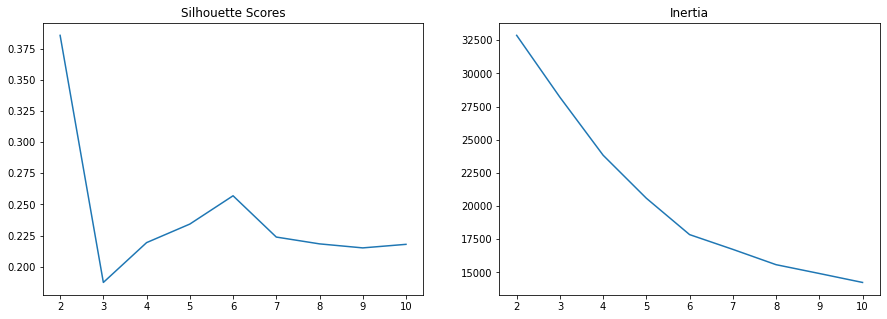

In [371]:
# Kmeans Model Fit on the Data

# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_train_processed2)
  sils.append(silhouette_score(X_train_processed2, kmeans.labels_))
  inertias.append(kmeans.inertia_)

# Plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

Based on the above Inertia graph k = 4 or 6 indicate elbow so it would be the optimal value

Based on the above Silhouette Score graph k = 2 would be the optimal value.

## Choose a K Based on the Results

I will choose a K value of 2, pertaining to the peak of the Silhouette Score Graph above. As it does have a clear indication of the amount clusters it would think is best compared to the interia plot where the elbow could be 3 or 4.

In [372]:
# Refit KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_processed2)
# Add the clusters as a column in the dataframe
df3['Cluster'] = kmeans.labels_
df3.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Smoking_Status,Stroke,Cluster
id,,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,229,Former_Smoker,1,1
51676,Female,61,0,0,Yes,Self_Employed,Rural,203,Never_Smoked,1,1
31112,Male,80,0,1,Yes,Private,Rural,106,Never_Smoked,1,1
60182,Female,49,0,0,Yes,Private,Urban,172,Active_Smoker,1,1
1665,Female,79,1,0,Yes,Self_Employed,Rural,175,Never_Smoked,1,1


## Cluster Visualization and Breakdown Analyst

In [375]:
# Group the Dataframe by Cluster and Aggregate by Mean Values
# This is will give us an average of each cluster so we can better understand, analyze, and breakdown each cluster
cluster_groups_mean = df3.groupby('Cluster', as_index=False).mean()
cluster_groups_mean

,Cluster,Age,Hypertension,Heart_Disease,Avg_Glucose_Level,Stroke
0,0,38.979323,0.000470,0.000235,101.930216,0.000470
1,1,64.460187,0.580796,0.322014,130.152225,0.289227


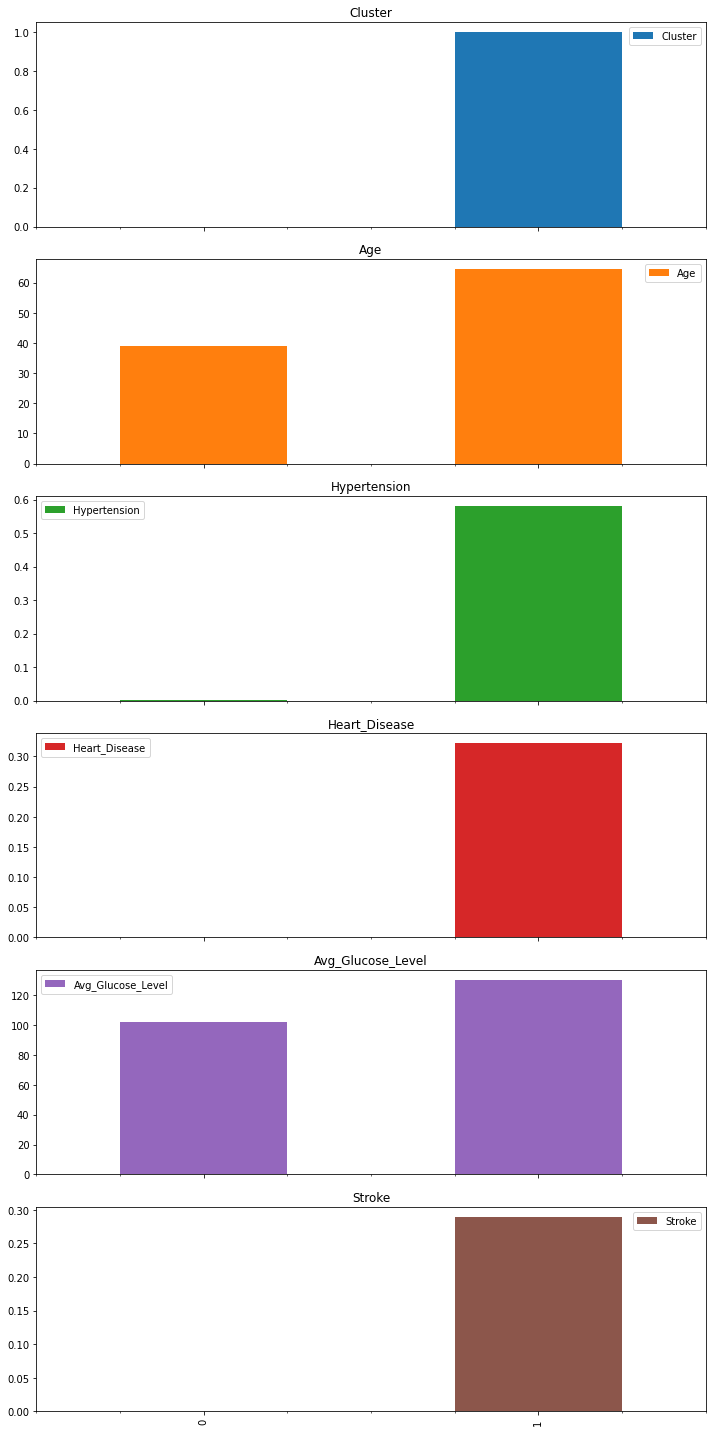

In [376]:
# Visualization of all the Clusters by Mean Values
# This will give us a visual understanding of the data, and making cluster analyst easier to understand
cluster_groups_mean.plot(subplots=True, kind='bar', figsize=(10,20))
plt.tight_layout()

**Breakdown of Clusters**

**Cluster 0**- Are a cluster of individuals around the age of 40, with an Average Glucose lvl around 100

**Cluster 1**- Are Houses built in the late 90's that Sell for ~70k on average, Usually a two floor house with 3 bedrooms and 1 1/2 baths with about 1500 square feet of living space, which is mostly on the second floor. This cluster usually has little to no basement or garge, but this cluster is more likely to have a deck and enclosed porch which adds about 300 square feet.

# **Deep Neural Networking w/ Dropout and Early Stopping**

## Preprocessing

In [305]:
# Make a new datafame
df4= '/content/healthcare-dataset-stroke-data.csv'
df4= pd.read_csv(df4, index_col=0)
df4.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [306]:
# Rename Columns to Clean Things Up
df4.rename(columns = {'gender':'Gender', 'age':'Age', 'hypertension':'Hypertension', 'heart_disease':'Heart_Disease', 'ever_married':'Ever_Married', 'work_type':'Work_Type', 'Residence_type':'Residence_Type', 'avg_glucose_level':'Avg_Glucose_Level', 'bmi':'BMI', 'smoking_status':'Smoking_Status', 'stroke':'Stroke'}, inplace = True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             5110 non-null   object 
 1   Age                5110 non-null   float64
 2   Hypertension       5110 non-null   int64  
 3   Heart_Disease      5110 non-null   int64  
 4   Ever_Married       5110 non-null   object 
 5   Work_Type          5110 non-null   object 
 6   Residence_Type     5110 non-null   object 
 7   Avg_Glucose_Level  5110 non-null   float64
 8   BMI                4909 non-null   float64
 9   Smoking_Status     5110 non-null   object 
 10  Stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [307]:
# Check for Duplicates
df4.duplicated().sum()

0

In [308]:
# Identify and address any missing values in this dataset. 
df4.isna().sum()

Gender                 0
Age                    0
Hypertension           0
Heart_Disease          0
Ever_Married           0
Work_Type              0
Residence_Type         0
Avg_Glucose_Level      0
BMI                  201
Smoking_Status         0
Stroke                 0
dtype: int64

In [309]:
# Drop BMI column
df4 = df4.drop(columns=['BMI'])
df4.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Smoking_Status,Stroke
id,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1


In [310]:
# Round the Age column
df4['Age'] = df4['Age'].apply(np.ceil)
df4['Age'] = df4['Age'].apply(np.int64) 
df4['Age'].unique()

array([67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 54, 50, 64, 75, 60, 57, 71,
       52, 82, 65, 58, 42, 48, 72, 63, 76, 39, 77, 73, 56, 45, 70, 66, 51,
       43, 68, 47, 53, 38, 55,  2, 46, 32, 14,  3,  8, 37, 40, 35, 20, 44,
       25, 27, 23, 17, 13,  4, 16, 22, 30, 29, 11, 21, 18, 33, 24, 34, 36,
        1, 41,  5, 26, 31,  7, 12, 62,  9, 15, 28, 10, 19,  6])

In [311]:
# Round the Avg_Glucose_Level
df4['Avg_Glucose_Level'] = df4['Avg_Glucose_Level'].apply(np.ceil) 
df4['Avg_Glucose_Level'] = df4['Avg_Glucose_Level'].apply(np.int64) 
df4['Avg_Glucose_Level'].unique()

array([229, 203, 106, 172, 175, 187,  71,  95,  77,  59,  81, 121, 105,
       220, 215, 168, 192, 222,  90, 218, 194, 234, 209, 103, 101, 190,
       196, 212, 213,  84, 197, 253,  85,  75,  93,  61,  79,  72, 145,
        91, 214, 244, 110, 108, 100,  76, 128, 125, 198,  60, 238, 195,
       181, 186,  62,  94, 114,  87,  73,  63, 180, 117,  97,  67, 241,
       111, 166, 144, 102,  89,  80, 112,  99, 227,  69,  65, 236,  83,
       191, 232,  74, 130, 107, 225, 217, 260, 250, 132, 201, 131, 183,
       207, 264, 141, 208, 200, 104, 152,  68, 240, 170, 224,  78,  58,
        82, 204, 134, 163,  92,  98,  57, 113, 138, 216, 210, 206, 119,
       272, 243, 115, 176,  88, 135,  96, 211, 251, 185, 219, 248,  70,
       162,  86, 199,  56, 150, 118, 142, 147, 221, 116, 235, 230, 139,
       137, 127,  64, 252, 124, 123, 179, 148, 140, 226, 228, 146, 202,
       171, 133,  66, 184, 109, 156, 164, 189, 205, 126, 159, 149, 157,
       122, 120, 223, 129, 174, 153, 255, 161, 136, 160, 237, 14

In [312]:
# Replace with correct values
df4['Work_Type']= df4['Work_Type'].replace('Self-employed', 'Self_Employed')
df4['Work_Type']= df4['Work_Type'].replace('children', 'Children')
df4['Work_Type']= df4['Work_Type'].replace('Govt_job', 'Govt_Job')
df4['Work_Type']= df4['Work_Type'].replace('Never_worked ', 'Never_Worked')
df4['Work_Type'].value_counts()

Private          2925
Self_Employed     819
Children          687
Govt_Job          657
Never_worked       22
Name: Work_Type, dtype: int64

In [313]:
# Replace with correct values
df4['Smoking_Status']= df4['Smoking_Status'].replace('never smoked', 'Never_Smoked')
df4['Smoking_Status']= df4['Smoking_Status'].replace('formerly smoked', 'Former_Smoker')
df4['Smoking_Status']= df4['Smoking_Status'].replace('smokes', 'Active_Smoker')
df4['Smoking_Status'].value_counts()

Never_Smoked     1892
Unknown          1544
Former_Smoker     885
Active_Smoker     789
Name: Smoking_Status, dtype: int64

In [314]:
df4.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Smoking_Status,Stroke
id,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,229,Former_Smoker,1
51676,Female,61,0,0,Yes,Self_Employed,Rural,203,Never_Smoked,1
31112,Male,80,0,1,Yes,Private,Rural,106,Never_Smoked,1
60182,Female,49,0,0,Yes,Private,Urban,172,Active_Smoker,1
1665,Female,79,1,0,Yes,Self_Employed,Rural,175,Never_Smoked,1


In [315]:
# Define features (X) and target (y)
X = df4.drop(columns = 'Stroke', axis=1)
y = df4['Stroke']

In [316]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.isna().any()

Gender               False
Age                  False
Hypertension         False
Heart_Disease        False
Ever_Married         False
Work_Type            False
Residence_Type       False
Avg_Glucose_Level    False
Smoking_Status       False
dtype: bool

In [317]:
#Create Selector
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe
# Tuples for Column Transformer
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
col_transformer
# fit ColumnTransformer on the training data
col_transformer.fit(X_train)
# transform train and test
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
# Make a new DataFrame with inputed missing values
X_test_df = pd.DataFrame(X_test_processed)
X_train_df = pd.DataFrame(X_train_processed)
# Check the data for sanity check to verify all changes have been made
display(X_train_df.info())
X_train_df.head()

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (3832, 19)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3832 non-null   float64
 1   1       3832 non-null   float64
 2   2       3832 non-null   float64
 3   3       3832 non-null   float64
 4   4       3832 non-null   float64
 5   5       3832 non-null   float64
 6   6       3832 non-null   float64
 7   7       3832 non-null   float64
 8   8       3832 non-null   float64
 9   9       3832 non-null   float64
 10  10      3832 non-null   float64
 11  11      3832 non-null   float64
 12  12      3832 non-null   float64
 13  13      3832 non-null   float64
 14  14      3832 non-null   float64
 15  15      3832 non-null   float64
 16  16      3832 non-null   float64
 17  1

None

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.737392,3.139351,-0.241394,2.823915,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.107105,-0.318537,-0.241394,-0.500218,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.381814,-0.318537,-0.241394,-0.412162,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.515156,-0.318537,-0.241394,-0.940501,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.515156,-0.318537,-0.241394,0.116177,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [318]:
sm = SMOTE(random_state = 42)
X_train_df, y_train = sm.fit_resample(X_train_df, y_train)

In [331]:
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [320]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

## Deep Neural Networking Normal Model

In [321]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train_df.shape[1]
input_shape

19

In [342]:
# Without dropout

# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, 
                input_dim = input_shape, 
                activation = 'relu')) 
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [323]:
# Compile Model with Metrics
model.compile(loss='bce', optimizer='adam', metrics=['accuracy',
                                                         metrics.Precision(),
                                                         metrics.Recall()])

In [324]:
history = model.fit(X_train_df, y_train,
                        validation_data=(X_test_df, y_test),
                        epochs=15,
                        verbose=0)

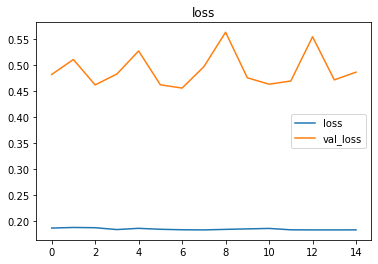

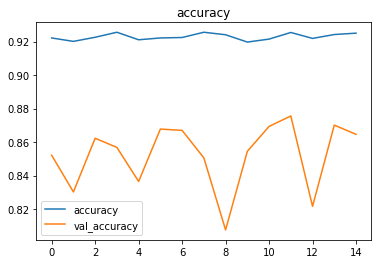

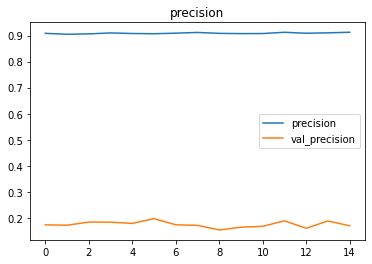

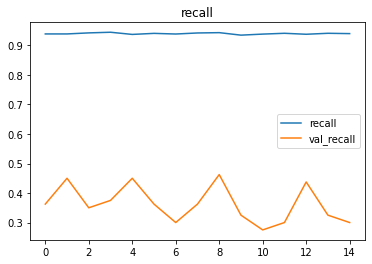

In [325]:
# Plot Learning History
plot_history(history)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1198
           1       0.17      0.30      0.22        80

    accuracy                           0.86      1278
   macro avg       0.56      0.60      0.57      1278
weighted avg       0.90      0.86      0.88      1278



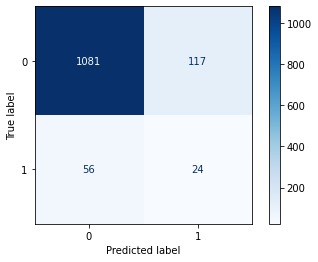

In [326]:
# Evaluate Model
 
# Make Predictions
y_preds = model.predict(X_test_df)
 
# Round the Predictions
y_preds = np.round(y_preds)
 
print(classification_report(y_test, y_preds))
 
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap='Blues');

## Deep Neural Networking w/ Dropout

In [344]:
# With dropout

# Sequential model
model2 = Sequential()
# First hidden layer
model2.add(Dense(19, 
                input_dim = input_shape,
                activation = 'relu')) 
model2.add(Dropout(.2))
model2.add(Dense(10, 
                activation = 'relu'))
model2.add(Dropout(.2))
model2.add(Dense(1, activation = 'sigmoid'))

In [345]:
model2.compile(loss='bce', optimizer='adam', metrics=['accuracy',
                                                         metrics.Precision(),
                                                         metrics.Recall()])

In [346]:
history = model2.fit(X_train_df, y_train,
                    validation_data = (X_test_df, y_test), 
                    epochs=100)

Epoch 1/100
229/229 [==============================] - 3s 8ms/step - loss: 0.6297 - accuracy: 0.6447 - precision_4: 0.6407 - recall_4: 0.6590 - val_loss: 0.5153 - val_accuracy: 0.7152 - val_precision_4: 0.1570 - val_recall_4: 0.8125
Epoch 2/100
229/229 [==============================] - 1s 5ms/step - loss: 0.5156 - accuracy: 0.7641 - precision_4: 0.7438 - recall_4: 0.8059 - val_loss: 0.4760 - val_accuracy: 0.6987 - val_precision_4: 0.1542 - val_recall_4: 0.8500
Epoch 3/100
229/229 [==============================] - 2s 9ms/step - loss: 0.4935 - accuracy: 0.7761 - precision_4: 0.7450 - recall_4: 0.8397 - val_loss: 0.4448 - val_accuracy: 0.7426 - val_precision_4: 0.1749 - val_recall_4: 0.8375
Epoch 4/100
229/229 [==============================] - 2s 8ms/step - loss: 0.4727 - accuracy: 0.7858 - precision_4: 0.7556 - recall_4: 0.8449 - val_loss: 0.4322 - val_accuracy: 0.7527 - val_precision_4: 0.1722 - val_recall_4: 0.7750
Epoch 5/100
229/229 [==============================] - 1s 6ms/step -

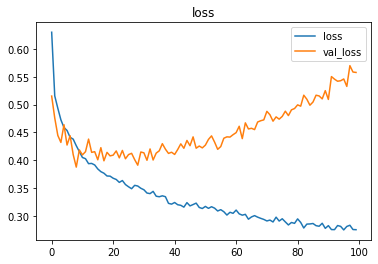

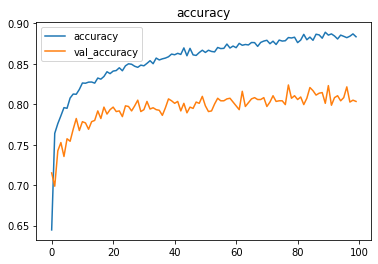

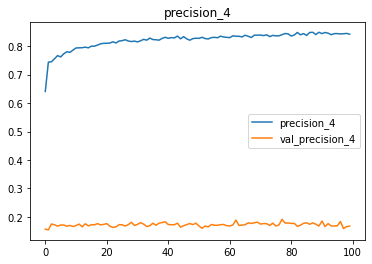

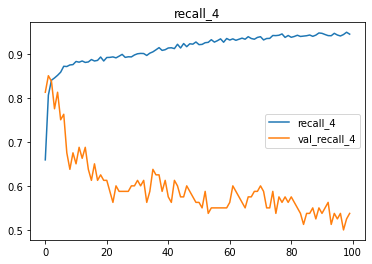

In [347]:
# Visualize the loss
plot_history(history)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1198
           1       0.17      0.30      0.22        80

    accuracy                           0.86      1278
   macro avg       0.56      0.60      0.57      1278
weighted avg       0.90      0.86      0.88      1278



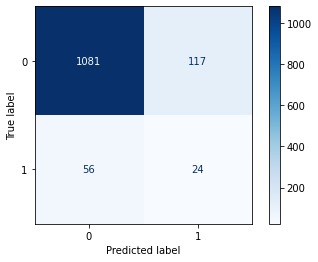

In [348]:
# Evaluate Model
 
# Make Predictions
y_preds2 = model2.predict(X_test_df)
 
# Round the Predictions
y_preds2 = np.round(y_preds)
 
print(classification_report(y_test, y_preds2))
 
ConfusionMatrixDisplay.from_predictions(y_test, y_preds2, cmap='Blues');

## Deep Neural Networking w/ Early Stopping

In [337]:
# With early stopping
# Sequential model
model3 = Sequential()
# First hidden layer
model3.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model3.add(Dense(10, 
                activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [338]:
model3.compile(loss='bce', optimizer='adam', metrics=['accuracy',
                                                         metrics.Precision(),
                                                         metrics.Recall()])

In [339]:
history = model3.fit(X_train_df, y_train,
                    validation_data = (X_test_df, y_test), 
                    epochs=100)

Epoch 1/100
229/229 [==============================] - 2s 5ms/step - loss: 0.5175 - accuracy: 0.7516 - precision_3: 0.7118 - recall_3: 0.8455 - val_loss: 0.5320 - val_accuracy: 0.7152 - val_precision_3: 0.1520 - val_recall_3: 0.7750
Epoch 2/100
229/229 [==============================] - 1s 3ms/step - loss: 0.4497 - accuracy: 0.7977 - precision_3: 0.7676 - recall_3: 0.8539 - val_loss: 0.4250 - val_accuracy: 0.7731 - val_precision_3: 0.1779 - val_recall_3: 0.7250
Epoch 3/100
229/229 [==============================] - 1s 3ms/step - loss: 0.4342 - accuracy: 0.8066 - precision_3: 0.7743 - recall_3: 0.8654 - val_loss: 0.4309 - val_accuracy: 0.7731 - val_precision_3: 0.1779 - val_recall_3: 0.7250
Epoch 4/100
229/229 [==============================] - 1s 3ms/step - loss: 0.4233 - accuracy: 0.8134 - precision_3: 0.7807 - recall_3: 0.8717 - val_loss: 0.4865 - val_accuracy: 0.7426 - val_precision_3: 0.1662 - val_recall_3: 0.7750
Epoch 5/100
229/229 [==============================] - 1s 3ms/step -

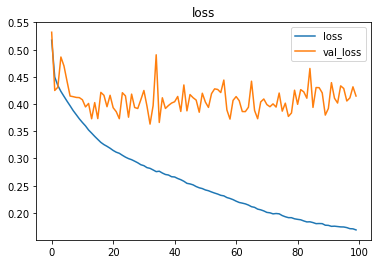

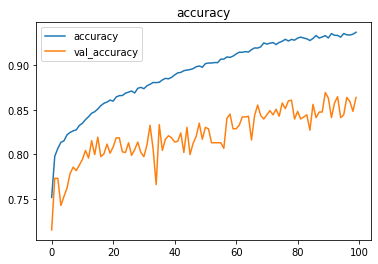

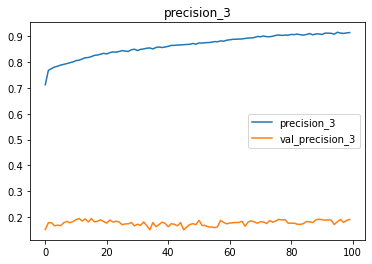

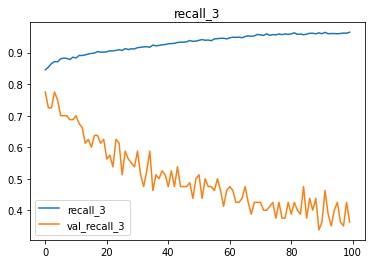

In [340]:
# Visualize the loss
plot_history(history)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1198
           1       0.17      0.30      0.22        80

    accuracy                           0.86      1278
   macro avg       0.56      0.60      0.57      1278
weighted avg       0.90      0.86      0.88      1278



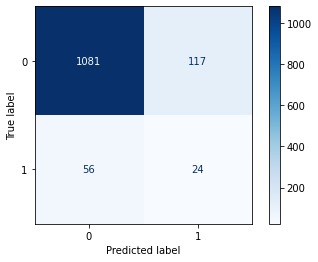

In [343]:
# Evaluate Model
 
# Make Predictions
y_preds3 = model3.predict(X_test_df)
 
# Round the Predictions
y_preds3 = np.round(y_preds)
 
print(classification_report(y_test, y_preds3))
 
ConfusionMatrixDisplay.from_predictions(y_test, y_preds3, cmap='Blues');

# **Results**

All models tested performed very similiarly, with accuracy scores at or around 93.7%, before oversampling was applied.

After oversampling was applied all models preformed very differently, giving a better outcome of results. 

The Random Forest Classifier had an accuracy of 98.3% with a recall of 97% and a precision of 100%.

Therefore for my production model I will choose the Random Forest Classifier Model, since it preformed the best on all metrics.




The data shows that if you're a 65+ y/o Male, Smoker, with Hypertension and Heart Disease with elevated Avg Glucose Level, has been married and had kids, and worked in the Private Sector then you would be an indivdual with the absolute highest risk to have a stroke.



Testing-set Accuracy score is: 0.9178403755868545
Training-set Accuracy score is: 1.0
              precision    recall  f1-score   support

   No Stroke       0.94      0.97      0.96      1198
      Stroke       0.20      0.10      0.13        80

    accuracy                           0.92      1278
   macro avg       0.57      0.54      0.54      1278
weighted avg       0.90      0.92      0.91      1278



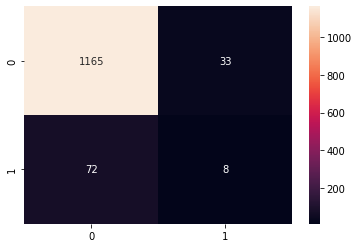

In [304]:
# Random Forest Classifier and Evaluate the Model
clf_rf = RandomForestClassifier(random_state=777)
clf_rf = clf_rf.fit(X_train_df,y_train)
y_pred_rf = clf_rf.predict(X_test_df)
acc = accuracy_score(y_test, y_pred_rf)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,clf_rf.predict(X_train_df)))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, fmt = "d")
target_names = ['No Stroke', 'Stroke']
print(classification_report(y_test, y_pred_rf, target_names=target_names))